In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


___

In [9]:
#@title Import Libraries
import pandas as pd
import numpy as np

from datetime import datetime 
import time

In [10]:
#Split Train/Test
from sklearn.model_selection import train_test_split

#Vectorizers
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

#Balancing Data
from imblearn.over_sampling import SMOTE

#ML Classification Libraries
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV  #https://stackoverflow.com/questions/55250963/how-to-get-probabilities-for-sgdclassifier-linearsvm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
!pip install scikit-multilearn
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset

#Pipeline
#from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline, make_pipeline
import joblib

#Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay
from mlxtend.plotting import plot_confusion_matrix
from sklearn import metrics

#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

#Visualizations
import matplotlib.pyplot as plt
!pip install scikit-plot
import scikitplot as skplt

#Save Model
import joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
import warnings
warnings.filterwarnings("ignore")

___

In [12]:
#@title Read Dataset
dfMly = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/DSPMalayTweetsCleanedV2.pkl')
dfMly.head()

,Tweets,flood_related,neutral,positive,negative,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,sentiment,emotion_count
0,khidmat brader sebar,1,0,0,1,0,0,0,1,0,0,0,0,negative,1
1,sulit coba l terobos lintas peureulak gayo lue...,1,0,0,1,0,0,0,1,0,1,0,1,negative,3
2,gerak harap,1,0,0,1,1,1,0,1,0,0,0,0,negative,3
3,pm dtg melaka dgrnya ptg lawat belimbing duria...,1,0,0,1,1,0,0,1,0,0,0,0,negative,2
4,pergh buku gudang bookxcess lupus akibat woi,1,0,0,1,1,0,0,1,0,1,0,0,negative,3


___

In [13]:
#@title Split Dataset
X = dfMly['Tweets']

y_flood = dfMly['flood_related']
X_flood_train, X_flood_test, y_flood_train, y_flood_test = train_test_split(X, y_flood, stratify=y_flood, test_size=0.2, random_state=42)

y_sentiment = dfMly['sentiment']
X_sentiment_train, X_sentiment_test, y_sentiment_train, y_sentiment_test = train_test_split(X, y_sentiment, stratify=y_sentiment, test_size=0.2, random_state=42)

dfEng_subset = dfMly[dfMly['neutral'] != 1]
train, test = train_test_split(dfEng_subset, shuffle=True, test_size=0.2, random_state=42)

X_emotion_train = train['Tweets']
y_emotion_train = train[['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']]

X_emotion_test = test['Tweets']
y_emotion_test = test[['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']]

___


Machine Learning Algorithms
* Logistic Regression
* Decision Tree
* Random Forest
* Support Vector Machine (SVM)
* K-Nearest Neighbour (KNN)
* Multinomial Naive Bayes

___

# Flood Related or Not (Binary)

Execution time: 0:00:02.119633

========== Logistic Regression ==========
Logistic Regression Test Accuracy: 0.8533333333333334
Accuracy score: 0.8533333333333334
F1-score: 0.8526111278598465
Precision-score: 0.8524034454015004
Recall-score: 0.8577472893231488
ROC-AUC-score: 0.9226794236779456
[[235  28]
 [ 60 277]]


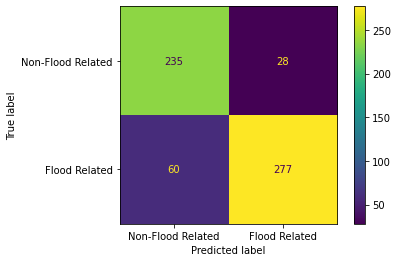

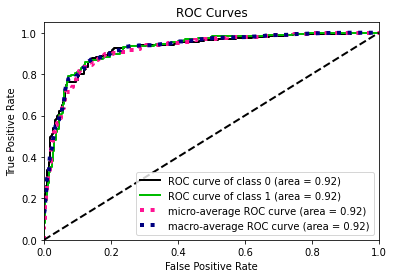


========== Decision Tree ==========
Decision Tree Test Accuracy: 0.765
Accuracy score: 0.765
F1-score: 0.7628598097832942
Precision-score: 0.7620535714285714
Recall-score: 0.7649185950739583
ROC-AUC-score: 0.7993647820739922
[[201  62]
 [ 79 258]]


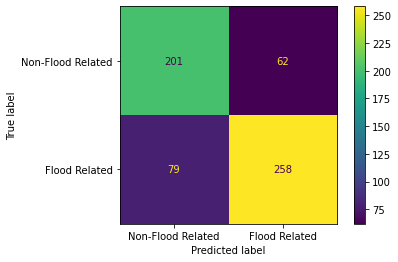

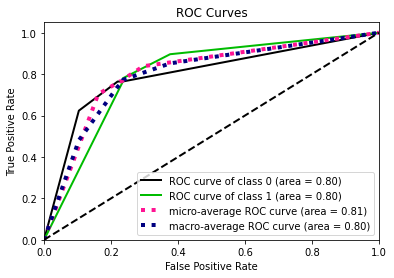


========== Random Forest ==========
Random Forest Test Accuracy: 0.8016666666666666
Accuracy score: 0.8016666666666666
F1-score: 0.8007362154951314
Precision-score: 0.8008979374110953
Recall-score: 0.8054913066534283
ROC-AUC-score: 0.8847468718619895
[[220  43]
 [ 76 261]]


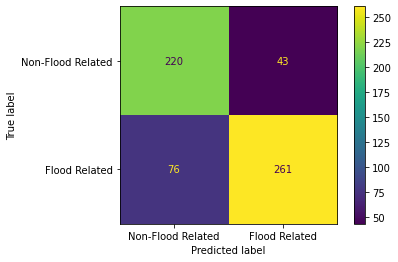

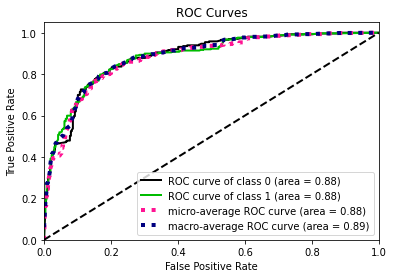


========== Support Vector Machine (SVM) ==========
Support Vector Machine (SVM) Test Accuracy: 0.83
Accuracy score: 0.83
F1-score: 0.8286117552172598
Precision-score: 0.8275573786938057
Recall-score: 0.8315487809005878
ROC-AUC-score: 0.9045819182904402
[[222  41]
 [ 61 276]]


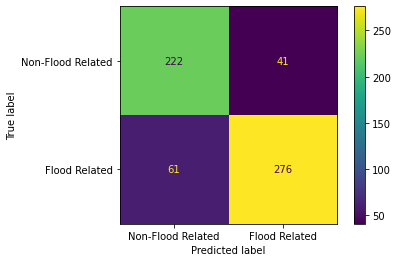

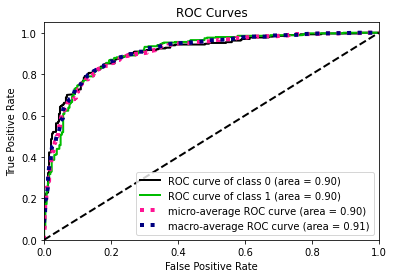


========== K-Nearest Neighbour (KNN) ==========
K-Nearest Neighbour (KNN) Test Accuracy: 0.5366666666666666
Accuracy score: 0.5366666666666666
F1-score: 0.48380867498514557
Precision-score: 0.7006576319923321
Recall-score: 0.5850323250330021
ROC-AUC-score: 0.6949938509099525
[[257   6]
 [272  65]]


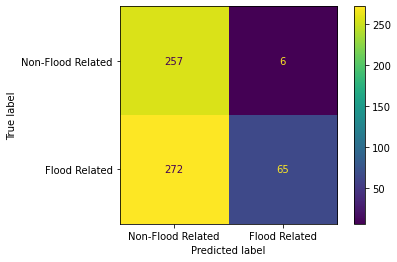

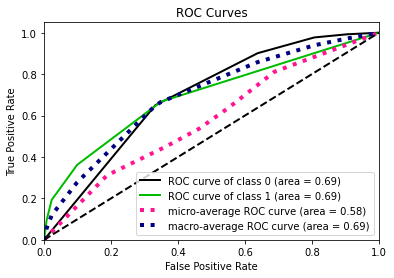


========== Multinomial Naive Bayes ==========
Multinomial Naive Bayes Test Accuracy: 0.8733333333333333
Accuracy score: 0.8733333333333333
F1-score: 0.8702835555960129
Precision-score: 0.8746191434320207
Recall-score: 0.8676196816012456
ROC-AUC-score: 0.933832406268687
[[216  47]
 [ 29 308]]


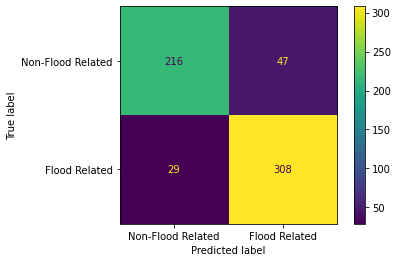

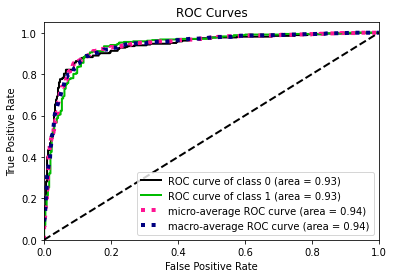

------------------------------------------
Best Accuracy Classifier: Multinomial Naive Bayes


In [14]:
#@title Bag of Words (Unigram)
#Vectorizing -> Balancing -> Training
flood_pipeline_lr = Pipeline([('cv', CountVectorizer(ngram_range=(1,1))),
                              ('smote', SMOTE(random_state=42)),
                              ('lr_model', LogisticRegression())])

flood_pipeline_dt = Pipeline([('cv', CountVectorizer(ngram_range=(1,1))),
                              ('smote', SMOTE(random_state=42)),
                              ('dt_model', DecisionTreeClassifier())])

flood_pipeline_rf = Pipeline([('cv', CountVectorizer(ngram_range=(1,1))),
                              ('smote', SMOTE(random_state=42)),
                              ('rf_model', RandomForestClassifier())])

flood_pipeline_svm = Pipeline([('cv', CountVectorizer(ngram_range=(1,1))),
                               ('smote', SMOTE(random_state=42)),
                               ('svm_model', CalibratedClassifierCV(SGDClassifier()))])

flood_pipeline_knn = Pipeline([('cv', CountVectorizer(ngram_range=(1,1))),
                               ('smote', SMOTE(random_state=42)),
                               ('knn_model', KNeighborsClassifier())])

flood_pipeline_mnb = Pipeline([('cv', CountVectorizer(ngram_range=(1,1))),
                               ('smote', SMOTE(random_state=42)),
                               ('mnb_model', MultinomialNB())])

#List of Pipelines
pipelines = [flood_pipeline_lr, flood_pipeline_dt, flood_pipeline_rf, flood_pipeline_svm, flood_pipeline_knn, flood_pipeline_mnb]

#Dictionary of Pipelines
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'Random Forest', 3: 'Support Vector Machine (SVM)', 4: 'K-Nearest Neighbour (KNN)', 5: 'Multinomial Naive Bayes'}

start = datetime.now()

#Fit the Pipelines
for pipe in pipelines:
    pipe.fit(X_flood_train, y_flood_train)
    
stop = datetime.now()
execution_time = stop-start
print("Execution time:", execution_time)

class_names = ['Non-Flood Related', 'Flood Related']

for i, model in enumerate(pipelines):
    flood_y_predict_test = model.predict(X_flood_test)
    flood_y_predict_proba = model.predict_proba(X_flood_test)
    print("\n========== {} ==========".format(pipe_dict[i]))
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_flood_test,y_flood_test)))
    print('Accuracy score:',accuracy_score(y_flood_test, flood_y_predict_test))
    print('F1-score:',f1_score(y_flood_test, flood_y_predict_test, average='macro'))
    print('Precision-score:',precision_score(y_flood_test, flood_y_predict_test, average='macro'))
    print('Recall-score:',recall_score(y_flood_test, flood_y_predict_test, average='macro'))
    print('ROC-AUC-score:',roc_auc_score(y_flood_test, flood_y_predict_proba[:, 1], average='macro', multi_class='ovo'))
    print(confusion_matrix(y_flood_test, flood_y_predict_test)) 
    
    (ConfusionMatrixDisplay((metrics.confusion_matrix(y_flood_test, flood_y_predict_test)),display_labels=class_names)).plot()
    skplt.metrics.plot_roc(y_flood_test, flood_y_predict_proba)
    plt.show()

#Best Accuracy Model    
best_accuracy = 0.0
best_classifier = 0
best_pipeline = ""

print('------------------------------------------')
for i, model in enumerate(pipelines):
    if model.score(X_flood_test,y_flood_test)>best_accuracy:
        best_accuracy=model.score(X_flood_test,y_flood_test)
        best_pipeline=model
        best_classifier=i
print('Best Accuracy Classifier: {}'.format(pipe_dict[best_classifier]))

___

Execution time: 0:00:04.736043

========== Logistic Regression ==========
Logistic Regression Test Accuracy: 0.6316666666666667
Accuracy score: 0.6316666666666667
F1-score: 0.6107773006261026
Precision-score: 0.7559297912713472
Recall-score: 0.6704369802890636
ROC-AUC-score: 0.7945075650731686
[[259   4]
 [217 120]]


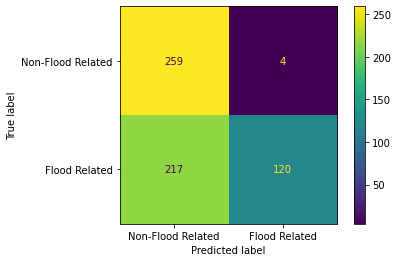

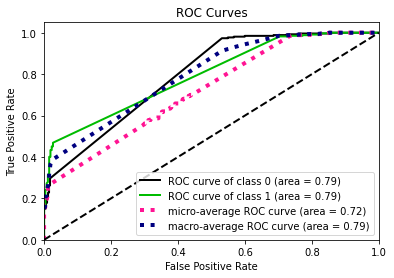


========== Decision Tree ==========
Decision Tree Test Accuracy: 0.5766666666666667
Accuracy score: 0.5766666666666667
F1-score: 0.5377952469337992
Precision-score: 0.7375491985311902
Recall-score: 0.6218930171159075
ROC-AUC-score: 0.6925398562579684
[[260   3]
 [251  86]]


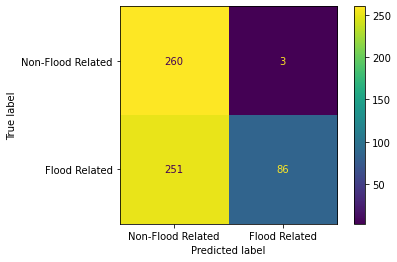

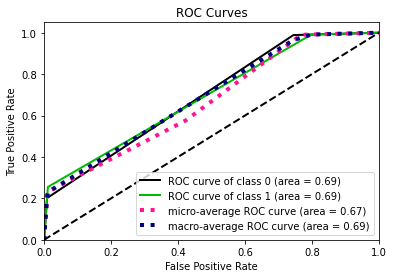


========== Random Forest ==========
Random Forest Test Accuracy: 0.5516666666666666
Accuracy score: 0.5516666666666666
F1-score: 0.5011112175791839
Precision-score: 0.733270202020202
Recall-score: 0.6000552853967573
ROC-AUC-score: 0.7841556565987069
[[261   2]
 [267  70]]


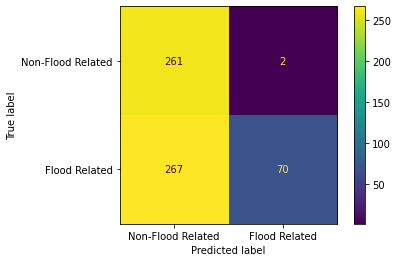

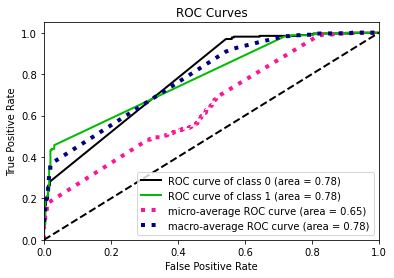


========== Support Vector Machine (SVM) ==========
Support Vector Machine (SVM) Test Accuracy: 0.68
Accuracy score: 0.68
F1-score: 0.6700879765395895
Precision-score: 0.7682368544902238
Recall-score: 0.7122113030429533
ROC-AUC-score: 0.7913991718473221
[[256   7]
 [185 152]]


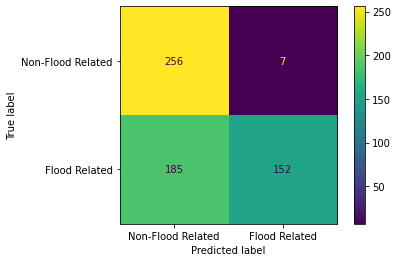

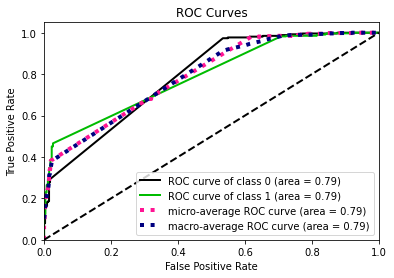


========== K-Nearest Neighbour (KNN) ==========
K-Nearest Neighbour (KNN) Test Accuracy: 0.4583333333333333
Accuracy score: 0.4583333333333333
F1-score: 0.3434321327681238
Precision-score: 0.7236394557823129
Recall-score: 0.5178041543026706
ROC-AUC-score: 0.5354052193927632
[[263   0]
 [325  12]]


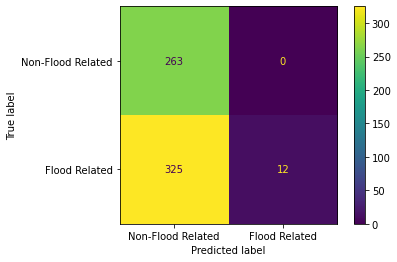

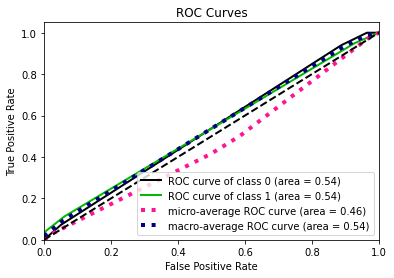


========== Multinomial Naive Bayes ==========
Multinomial Naive Bayes Test Accuracy: 0.6883333333333334
Accuracy score: 0.6883333333333334
F1-score: 0.6796107356103245
Precision-score: 0.772236518236742
Recall-score: 0.7196297006690662
ROC-AUC-score: 0.7923751283410996
[[256   7]
 [180 157]]


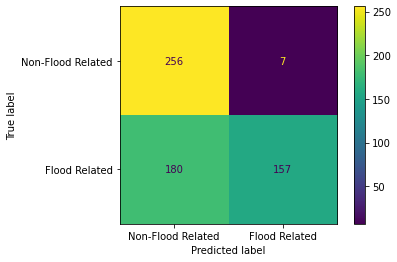

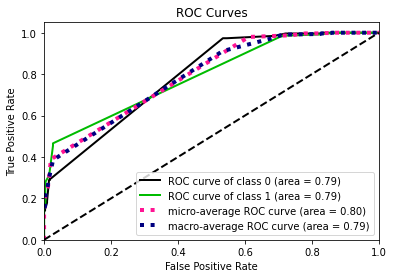

------------------------------------------
Best Accuracy Classifier: Multinomial Naive Bayes


In [15]:
#@title Bag of Words (Bigram)
#Vectorizing -> Balancing -> Training
flood_pipeline_lr = Pipeline([('cv', CountVectorizer(ngram_range=(2,2))),
                              ('smote', SMOTE(random_state=42)),
                              ('lr_model', LogisticRegression())])

flood_pipeline_dt = Pipeline([('cv', CountVectorizer(ngram_range=(2,2))),
                              ('smote', SMOTE(random_state=42)),
                              ('dt_model', DecisionTreeClassifier())])

flood_pipeline_rf = Pipeline([('cv', CountVectorizer(ngram_range=(2,2))),
                              ('smote', SMOTE(random_state=42)),
                              ('rf_model', RandomForestClassifier())])

flood_pipeline_svm = Pipeline([('cv', CountVectorizer(ngram_range=(2,2))),
                               ('smote', SMOTE(random_state=42)),
                               ('svm_model', CalibratedClassifierCV(SGDClassifier()))])

flood_pipeline_knn = Pipeline([('cv', CountVectorizer(ngram_range=(2,2))),
                               ('smote', SMOTE(random_state=42)),
                               ('knn_model', KNeighborsClassifier())])

flood_pipeline_mnb = Pipeline([('cv', CountVectorizer(ngram_range=(2,2))),
                               ('smote', SMOTE(random_state=42)),
                               ('mnb_model', MultinomialNB())])

#List of Pipelines
pipelines = [flood_pipeline_lr, flood_pipeline_dt, flood_pipeline_rf, flood_pipeline_svm, flood_pipeline_knn, flood_pipeline_mnb]

#Dictionary of Pipelines
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'Random Forest', 3: 'Support Vector Machine (SVM)', 4: 'K-Nearest Neighbour (KNN)', 5: 'Multinomial Naive Bayes'}

start = datetime.now()

#Fit the Pipelines
for pipe in pipelines:
    pipe.fit(X_flood_train, y_flood_train)
    
stop = datetime.now()
execution_time = stop-start
print("Execution time:", execution_time)

class_names = ['Non-Flood Related', 'Flood Related']

for i, model in enumerate(pipelines):
    flood_y_predict_test = model.predict(X_flood_test)
    flood_y_predict_proba = model.predict_proba(X_flood_test)
    print("\n========== {} ==========".format(pipe_dict[i]))
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_flood_test,y_flood_test)))
    print('Accuracy score:',accuracy_score(y_flood_test, flood_y_predict_test))
    print('F1-score:',f1_score(y_flood_test, flood_y_predict_test, average='macro'))
    print('Precision-score:',precision_score(y_flood_test, flood_y_predict_test, average='macro'))
    print('Recall-score:',recall_score(y_flood_test, flood_y_predict_test, average='macro'))
    print('ROC-AUC-score:',roc_auc_score(y_flood_test, flood_y_predict_proba[:, 1], average='macro', multi_class='ovo'))
    print(confusion_matrix(y_flood_test, flood_y_predict_test)) 
    
    (ConfusionMatrixDisplay((metrics.confusion_matrix(y_flood_test, flood_y_predict_test)),display_labels=class_names)).plot()
    skplt.metrics.plot_roc(y_flood_test, flood_y_predict_proba)
    plt.show()

#Best Accuracy Model    
best_accuracy = 0.0
best_classifier = 0
best_pipeline = ""

print('------------------------------------------')
for i, model in enumerate(pipelines):
    if model.score(X_flood_test,y_flood_test)>best_accuracy:
        best_accuracy=model.score(X_flood_test,y_flood_test)
        best_pipeline=model
        best_classifier=i
print('Best Accuracy Classifier: {}'.format(pipe_dict[best_classifier]))

___

Execution time: 0:00:03.743418

========== Logistic Regression ==========
Logistic Regression Test Accuracy: 0.88
Accuracy score: 0.88
F1-score: 0.8779371376258773
Precision-score: 0.8786444592896205
Recall-score: 0.8773115501348286
ROC-AUC-score: 0.9337477857634462
[[225  38]
 [ 34 303]]


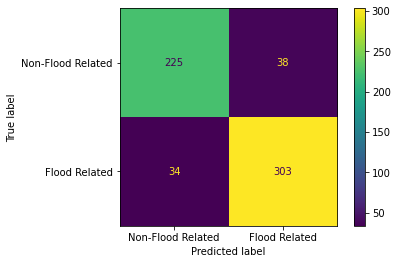

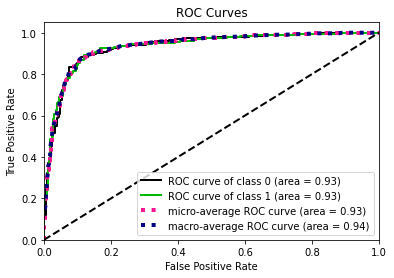


========== Decision Tree ==========
Decision Tree Test Accuracy: 0.8033333333333333
Accuracy score: 0.8033333333333333
F1-score: 0.7974805203720867
Precision-score: 0.8042553191489361
Recall-score: 0.7944511514030079
ROC-AUC-score: 0.8278085545689432
[[190  73]
 [ 45 292]]


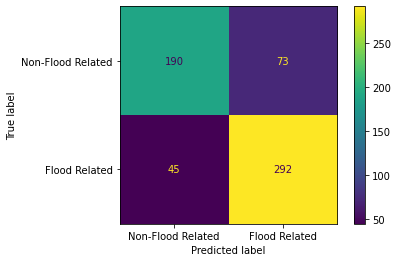

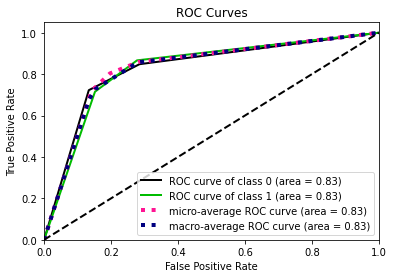


========== Random Forest ==========
Random Forest Test Accuracy: 0.8316666666666667
Accuracy score: 0.8316666666666667
F1-score: 0.8232406464842097
Precision-score: 0.8463481346409738
Recall-score: 0.8171689363766628
ROC-AUC-score: 0.9169252293215692
[[184  79]
 [ 22 315]]


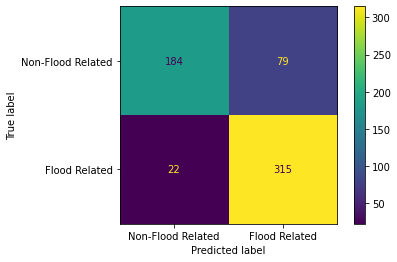

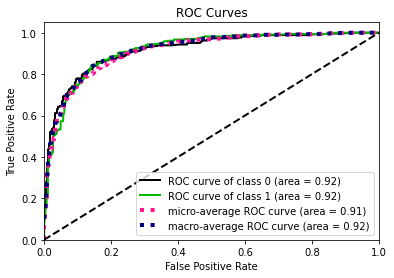


========== Support Vector Machine (SVM) ==========
Support Vector Machine (SVM) Test Accuracy: 0.8683333333333333
Accuracy score: 0.8683333333333333
F1-score: 0.865505588327928
Precision-score: 0.8682857142857143
Recall-score: 0.863586104184766
ROC-AUC-score: 0.924439530186955
[[217  46]
 [ 33 304]]


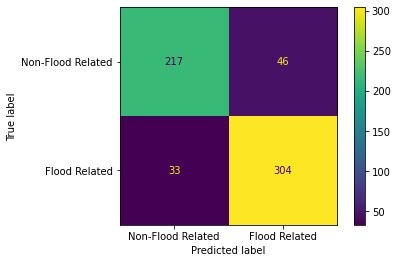

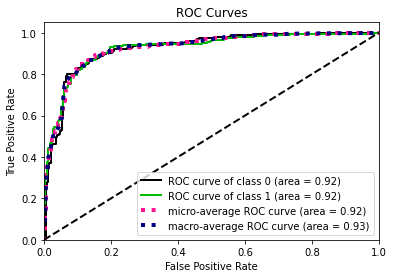


========== K-Nearest Neighbour (KNN) ==========
K-Nearest Neighbour (KNN) Test Accuracy: 0.6583333333333333
Accuracy score: 0.6583333333333333
F1-score: 0.5976592271786099
Precision-score: 0.7059553349875931
Recall-score: 0.6198677663571437
ROC-AUC-score: 0.7045672507361984
[[ 81 182]
 [ 23 314]]


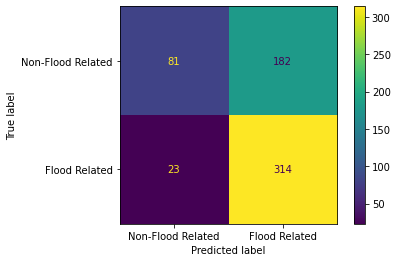

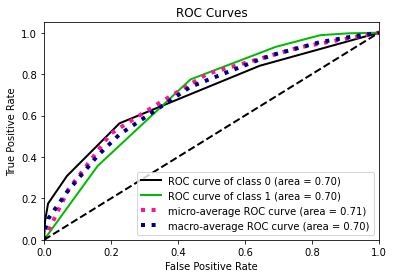


========== Multinomial Naive Bayes ==========
Multinomial Naive Bayes Test Accuracy: 0.875
Accuracy score: 0.875
F1-score: 0.8720569545574735
Precision-score: 0.8760851591566763
Recall-score: 0.8695208222856563
ROC-AUC-score: 0.9374485225259785
[[217  46]
 [ 29 308]]


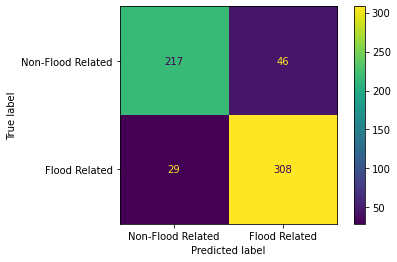

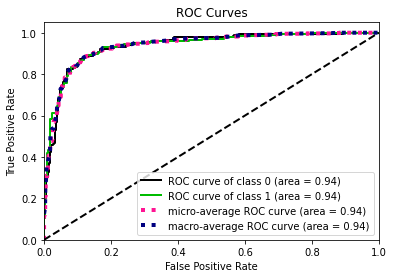

------------------------------------------
Best Accuracy Classifier: Logistic Regression


In [16]:
#@title TF-IDF (Unigram)
#Vectorizing -> Balancing -> Training
flood_pipeline_lr = Pipeline([('cv', TfidfVectorizer(ngram_range=(1,1))),
                              ('smote', SMOTE(random_state=42)),
                              ('lr_model', LogisticRegression())])

flood_pipeline_dt = Pipeline([('cv', TfidfVectorizer(ngram_range=(1,1))),
                              ('smote', SMOTE(random_state=42)),
                              ('dt_model', DecisionTreeClassifier())])

flood_pipeline_rf = Pipeline([('cv', TfidfVectorizer(ngram_range=(1,1))),
                              ('smote', SMOTE(random_state=42)),
                              ('rf_model', RandomForestClassifier())])

flood_pipeline_svm = Pipeline([('cv', TfidfVectorizer(ngram_range=(1,1))),
                               ('smote', SMOTE(random_state=42)),
                               ('svm_model', CalibratedClassifierCV(SGDClassifier()))])

flood_pipeline_knn = Pipeline([('cv', TfidfVectorizer(ngram_range=(1,1))),
                               ('smote', SMOTE(random_state=42)),
                               ('knn_model', KNeighborsClassifier())])

flood_pipeline_mnb = Pipeline([('cv', TfidfVectorizer(ngram_range=(1,1))),
                               ('smote', SMOTE(random_state=42)),
                               ('mnb_model', MultinomialNB())])

#List of Pipelines
pipelines = [flood_pipeline_lr, flood_pipeline_dt, flood_pipeline_rf, flood_pipeline_svm, flood_pipeline_knn, flood_pipeline_mnb]

#Dictionary of Pipelines
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'Random Forest', 3: 'Support Vector Machine (SVM)', 4: 'K-Nearest Neighbour (KNN)', 5: 'Multinomial Naive Bayes'}

start = datetime.now()

#Fit the Pipelines
for pipe in pipelines:
    pipe.fit(X_flood_train, y_flood_train)
    
stop = datetime.now()
execution_time = stop-start
print("Execution time:", execution_time)

class_names = ['Non-Flood Related', 'Flood Related']

for i, model in enumerate(pipelines):
    flood_y_predict_test = model.predict(X_flood_test)
    flood_y_predict_proba = model.predict_proba(X_flood_test)
    print("\n========== {} ==========".format(pipe_dict[i]))
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_flood_test,y_flood_test)))
    print('Accuracy score:',accuracy_score(y_flood_test, flood_y_predict_test))
    print('F1-score:',f1_score(y_flood_test, flood_y_predict_test, average='macro'))
    print('Precision-score:',precision_score(y_flood_test, flood_y_predict_test, average='macro'))
    print('Recall-score:',recall_score(y_flood_test, flood_y_predict_test, average='macro'))
    print('ROC-AUC-score:',roc_auc_score(y_flood_test, flood_y_predict_proba[:, 1], average='macro', multi_class='ovo'))
    print(confusion_matrix(y_flood_test, flood_y_predict_test)) 
    
    (ConfusionMatrixDisplay((metrics.confusion_matrix(y_flood_test, flood_y_predict_test)),display_labels=class_names)).plot()
    skplt.metrics.plot_roc(y_flood_test, flood_y_predict_proba)
    plt.show()

#Best Accuracy Model    
best_accuracy = 0.0
best_classifier = 0
best_pipeline = ""

print('------------------------------------------')
for i, model in enumerate(pipelines):
    if model.score(X_flood_test,y_flood_test)>best_accuracy:
        best_accuracy=model.score(X_flood_test,y_flood_test)
        best_pipeline=model
        best_classifier=i
print('Best Accuracy Classifier: {}'.format(pipe_dict[best_classifier]))

___

Execution time: 0:00:05.377963

========== Logistic Regression ==========
Logistic Regression Test Accuracy: 0.68
Accuracy score: 0.68
F1-score: 0.6114618746964546
Precision-score: 0.7792118789263278
Recall-score: 0.6379032167074725
ROC-AUC-score: 0.7917094470332051
[[ 78 185]
 [  7 330]]


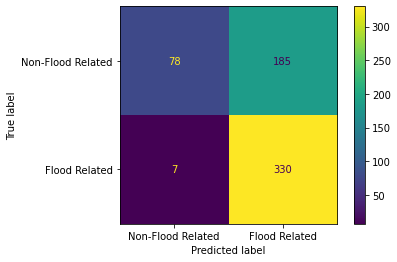

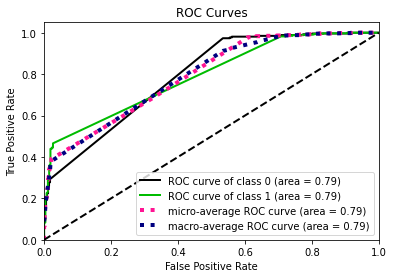


========== Decision Tree ==========
Decision Tree Test Accuracy: 0.6383333333333333
Accuracy score: 0.6383333333333333
F1-score: 0.5310321974131131
Precision-score: 0.7845454545454545
Recall-score: 0.5882873938012659
ROC-AUC-score: 0.6893524838938974
[[ 48 215]
 [  2 335]]


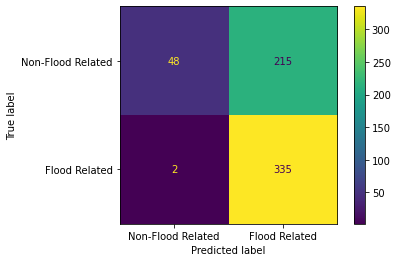

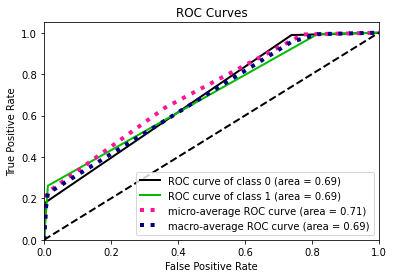


========== Random Forest ==========
Random Forest Test Accuracy: 0.6283333333333333
Accuracy score: 0.6283333333333333
F1-score: 0.5119477951931599
Precision-score: 0.7785317200784827
Recall-score: 0.5768805496948021
ROC-AUC-score: 0.7788584129706312
[[ 42 221]
 [  2 335]]


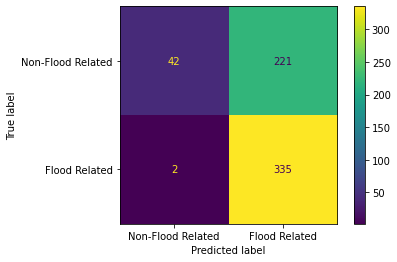

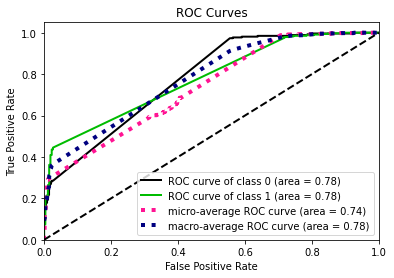


========== Support Vector Machine (SVM) ==========
Support Vector Machine (SVM) Test Accuracy: 0.6816666666666666
Accuracy score: 0.6816666666666666
F1-score: 0.6128260656574018
Precision-score: 0.7850221483942414
Recall-score: 0.6393868962326952
ROC-AUC-score: 0.7913145513420813
[[ 78 185]
 [  6 331]]


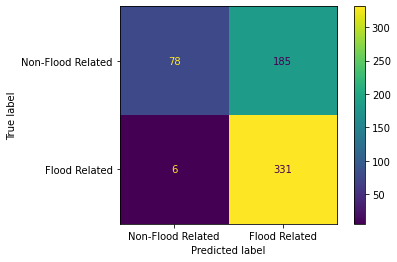

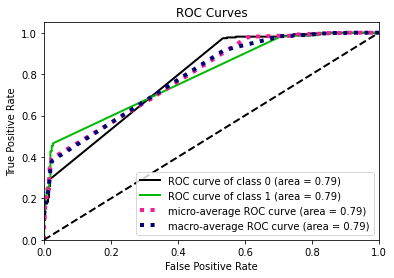


========== K-Nearest Neighbour (KNN) ==========
K-Nearest Neighbour (KNN) Test Accuracy: 0.5866666666666667
Accuracy score: 0.5866666666666667
F1-score: 0.4280091026508396
Precision-score: 0.7169997532691833
Recall-score: 0.529769493743724
ROC-AUC-score: 0.6174024889711275
[[ 18 245]
 [  3 334]]


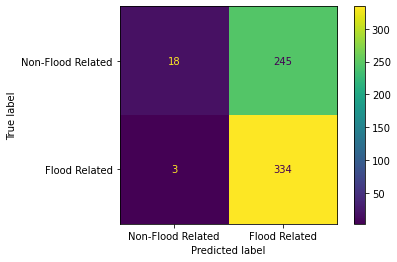

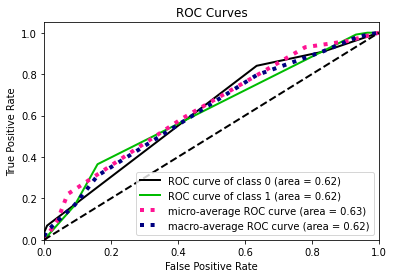


========== Multinomial Naive Bayes ==========
Multinomial Naive Bayes Test Accuracy: 0.6883333333333334
Accuracy score: 0.6883333333333334
F1-score: 0.6796107356103245
Precision-score: 0.772236518236742
Recall-score: 0.7196297006690662
ROC-AUC-score: 0.7919915153840078
[[256   7]
 [180 157]]


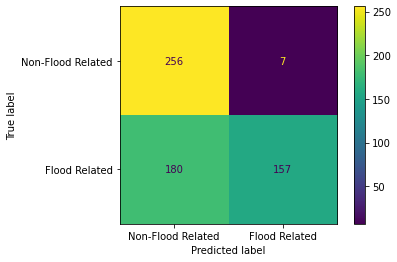

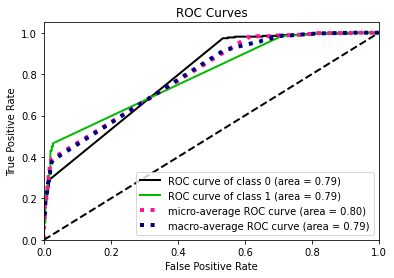

------------------------------------------
Best Accuracy Classifier: Multinomial Naive Bayes


In [17]:
#@title TF-IDF (Bigram)
#Vectorizing -> Balancing -> Training
flood_pipeline_lr = Pipeline([('cv', TfidfVectorizer(ngram_range=(2,2))),
                              ('smote', SMOTE(random_state=42)),
                              ('lr_model', LogisticRegression())])

flood_pipeline_dt = Pipeline([('cv', TfidfVectorizer(ngram_range=(2,2))),
                              ('smote', SMOTE(random_state=42)),
                              ('dt_model', DecisionTreeClassifier())])

flood_pipeline_rf = Pipeline([('cv', TfidfVectorizer(ngram_range=(2,2))),
                              ('smote', SMOTE(random_state=42)),
                              ('rf_model', RandomForestClassifier())])

flood_pipeline_svm = Pipeline([('cv', TfidfVectorizer(ngram_range=(2,2))),
                               ('smote', SMOTE(random_state=42)),
                               ('svm_model', CalibratedClassifierCV(SGDClassifier()))])

flood_pipeline_knn = Pipeline([('cv', TfidfVectorizer(ngram_range=(2,2))),
                               ('smote', SMOTE(random_state=42)),
                               ('knn_model', KNeighborsClassifier())])

flood_pipeline_mnb = Pipeline([('cv', TfidfVectorizer(ngram_range=(2,2))),
                               ('smote', SMOTE(random_state=42)),
                               ('mnb_model', MultinomialNB())])

#List of Pipelines
pipelines = [flood_pipeline_lr, flood_pipeline_dt, flood_pipeline_rf, flood_pipeline_svm, flood_pipeline_knn, flood_pipeline_mnb]

#Dictionary of Pipelines
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'Random Forest', 3: 'Support Vector Machine (SVM)', 4: 'K-Nearest Neighbour (KNN)', 5: 'Multinomial Naive Bayes'}

start = datetime.now()

#Fit the Pipelines
for pipe in pipelines:
    pipe.fit(X_flood_train, y_flood_train)
    
stop = datetime.now()
execution_time = stop-start
print("Execution time:", execution_time)

class_names = ['Non-Flood Related', 'Flood Related']

for i, model in enumerate(pipelines):
    flood_y_predict_test = model.predict(X_flood_test)
    flood_y_predict_proba = model.predict_proba(X_flood_test)
    print("\n========== {} ==========".format(pipe_dict[i]))
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_flood_test,y_flood_test)))
    print('Accuracy score:',accuracy_score(y_flood_test, flood_y_predict_test))
    print('F1-score:',f1_score(y_flood_test, flood_y_predict_test, average='macro'))
    print('Precision-score:',precision_score(y_flood_test, flood_y_predict_test, average='macro'))
    print('Recall-score:',recall_score(y_flood_test, flood_y_predict_test, average='macro'))
    print('ROC-AUC-score:',roc_auc_score(y_flood_test, flood_y_predict_proba[:, 1], average='macro', multi_class='ovo'))
    print(confusion_matrix(y_flood_test, flood_y_predict_test)) 
    
    (ConfusionMatrixDisplay((metrics.confusion_matrix(y_flood_test, flood_y_predict_test)),display_labels=class_names)).plot()
    skplt.metrics.plot_roc(y_flood_test, flood_y_predict_proba)
    plt.show()

#Best Accuracy Model    
best_accuracy = 0.0
best_classifier = 0
best_pipeline = ""

print('------------------------------------------')
for i, model in enumerate(pipelines):
    if model.score(X_flood_test,y_flood_test)>best_accuracy:
        best_accuracy=model.score(X_flood_test,y_flood_test)
        best_pipeline=model
        best_classifier=i
print('Best Accuracy Classifier: {}'.format(pipe_dict[best_classifier]))

___

In [18]:
#@title Hyperparameter Tuning (GridSearchCV)
#TF-IDF (Unigram) - Logistic Regression
#https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

flood_pipeline_lr = Pipeline([('cv', TfidfVectorizer(ngram_range=(1,1))),
                              ('smote', SMOTE(random_state=42)),
                              ('lr_model', LogisticRegression())])

param_grid = [{'lr_model__C': [1, 10, 100, 1000, 1e4, 1e5],
               'lr_model__solver': ['lbfgs', 'sag', 'saga']}]

start = datetime.now()

grid_search = GridSearchCV(flood_pipeline_lr, param_grid, cv = 5, verbose=True, n_jobs=-1)
flood_best_model = grid_search.fit(X_flood_train, y_flood_train)

stop = datetime.now()
execution_time = stop-start 
print("Execution time:", execution_time)

print("Best score:", grid_search.best_score_)
print("Best params:", grid_search.best_params_)
print(flood_best_model.best_estimator_)
print("The mean accuracy of the model is:",flood_best_model.score(X_flood_test,y_flood_test))
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Execution time: 0:00:14.475916
Best score: 0.875
Best params: {'lr_model__C': 1, 'lr_model__solver': 'lbfgs'}
Pipeline(steps=[('cv', TfidfVectorizer()), ('smote', SMOTE(random_state=42)),
                ('lr_model', LogisticRegression(C=1))])
The mean accuracy of the model is: 0.88
0.875 {'lr_model__C': 1, 'lr_model__solver': 'lbfgs'}
0.875 {'lr_model__C': 1, 'lr_model__solver': 'sag'}
0.8745833333333334 {'lr_model__C': 1, 'lr_model__solver': 'saga'}
0.8670833333333332 {'lr_model__C': 10, 'lr_model__solver': 'lbfgs'}
0.8670833333333332 {'lr_model__C': 10, 'lr_model__solver': 'sag'}
0.8674999999999999 {'lr_model__C': 10, 'lr_model__solver': 'saga'}
0.865 {'lr_model__C': 100, 'lr_model__solver': 'lbfgs'}
0.86625 {'lr_model__C': 100, 'lr_model__solver': 'sag'}
0.8662500000000002 {'lr_model__C': 100, 'lr_model__solver': 'saga'}
0.86 {'lr_model__C': 1000, 'lr_model__solver': 'lbfgs'}
0.8633333333333333 {'lr_model__C': 1000, 'lr_m

___

Execution time: 0:00:00.120851

========== Logistic Regression ==========
Logistic Regression Test Accuracy: 0.88
Accuracy score: 0.88
F1-score: 0.8779371376258773
Precision-score: 0.8786444592896205
Recall-score: 0.8773115501348286
ROC-AUC-score: 0.9337477857634462
[[225  38]
 [ 34 303]]


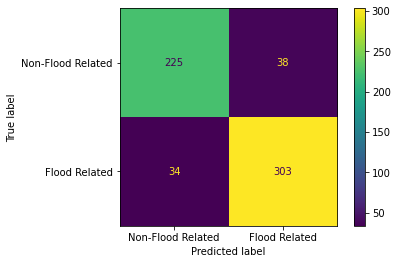

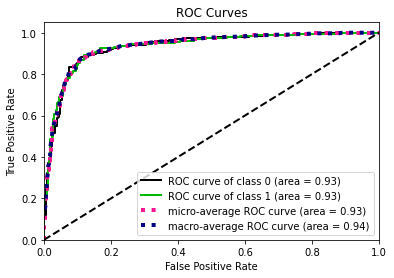

------------------------------------------
Best Accuracy Classifier: Logistic Regression


In [19]:
#@title Save Best Model (Flood - TFIDF - Unigram - LR)
flood_pipeline_lr = Pipeline([('cv', TfidfVectorizer(ngram_range=(1,1))),
                              ('smote', SMOTE(random_state=42)),
                              ('lr_model', LogisticRegression(C=1))])

#List of Pipelines
pipelines = [flood_pipeline_lr]

#Dictionary of Pipelines
pipe_dict = {0: 'Logistic Regression'}

start = datetime.now()

#Fit the Pipelines
for pipe in pipelines:
    pipe.fit(X_flood_train, y_flood_train)
    
stop = datetime.now()
execution_time = stop-start
print("Execution time:", execution_time)

class_names = ['Non-Flood Related', 'Flood Related']

for i, model in enumerate(pipelines):
    flood_y_predict_test = model.predict(X_flood_test)
    flood_y_predict_proba = model.predict_proba(X_flood_test)
    print("\n========== {} ==========".format(pipe_dict[i]))
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_flood_test,y_flood_test)))
    print('Accuracy score:',accuracy_score(y_flood_test, flood_y_predict_test))
    print('F1-score:',f1_score(y_flood_test, flood_y_predict_test, average='macro'))
    print('Precision-score:',precision_score(y_flood_test, flood_y_predict_test, average='macro'))
    print('Recall-score:',recall_score(y_flood_test, flood_y_predict_test, average='macro'))
    print('ROC-AUC-score:',roc_auc_score(y_flood_test, flood_y_predict_proba[:, 1], average='macro', multi_class='ovo'))
    print(confusion_matrix(y_flood_test, flood_y_predict_test)) 
    
    (ConfusionMatrixDisplay((metrics.confusion_matrix(y_flood_test, flood_y_predict_test)),display_labels=class_names)).plot()
    skplt.metrics.plot_roc(y_flood_test, flood_y_predict_proba)
    plt.show()

#Best Accuracy Model    
best_accuracy = 0.0
best_classifier = 0
best_pipeline = ""

print('------------------------------------------')
for i, model in enumerate(pipelines):
    if model.score(X_flood_test,y_flood_test)>best_accuracy:
        best_accuracy=model.score(X_flood_test,y_flood_test)
        best_pipeline=model
        best_classifier=i
print('Best Accuracy Classifier: {}'.format(pipe_dict[best_classifier]))

model_file = open("malay_flood_related_lr.pkl","wb")
joblib.dump(flood_pipeline_mnb,model_file)
model_file.close()

___

# Sentiment (Multiclass)

Execution time: 0:00:03.881056

========== Logistic Regression ==========
Logistic Regression Test Accuracy: 0.5166666666666667
Accuracy score: 0.5166666666666667
F1-score: 0.5156837891183242
Precision-score: 0.5210833633970684
Recall-score: 0.5221410491284771
ROC-AUC-score: 0.703032005252553
[[128  53  32]
 [ 40 102  96]
 [ 22  47  80]]


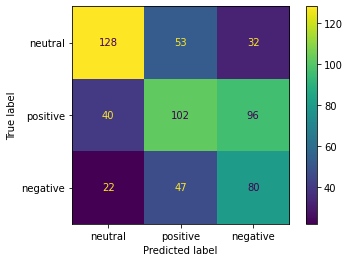

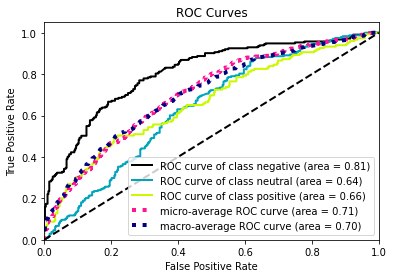


========== Decision Tree ==========
Decision Tree Test Accuracy: 0.47833333333333333
Accuracy score: 0.47833333333333333
F1-score: 0.4744988205165779
Precision-score: 0.4828325910979437
Recall-score: 0.4755712853247926
ROC-AUC-score: 0.6199353863232914
[[117  51  45]
 [ 38 105  95]
 [ 31  53  65]]


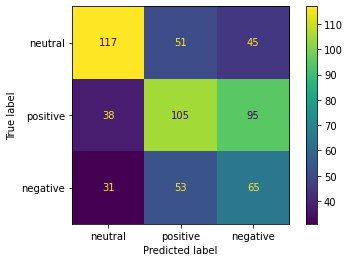

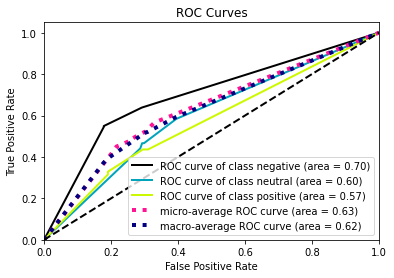


========== Random Forest ==========
Random Forest Test Accuracy: 0.4766666666666667
Accuracy score: 0.4766666666666667
F1-score: 0.47813377308811855
Precision-score: 0.49452688621675556
Recall-score: 0.4808486838034833
ROC-AUC-score: 0.6820080128973163
[[122  49  42]
 [ 30  92 116]
 [ 22  55  72]]


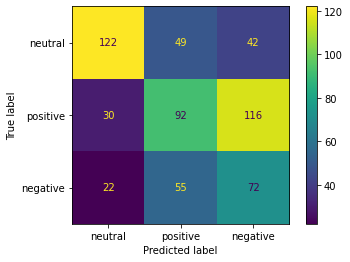

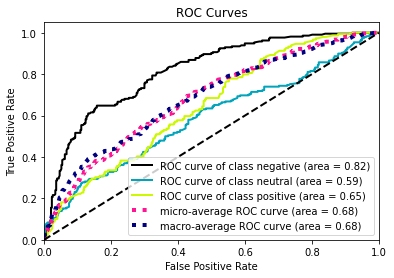


========== Support Vector Machine (SVM) ==========
Support Vector Machine (SVM) Test Accuracy: 0.51
Accuracy score: 0.51
F1-score: 0.5044552632973712
Precision-score: 0.5056880645961105
Recall-score: 0.5091593558367355
ROC-AUC-score: 0.6857974402541053
[[134  47  32]
 [ 49 102  87]
 [ 25  54  70]]


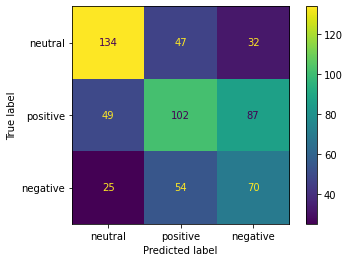

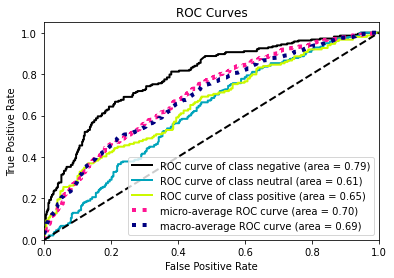


========== K-Nearest Neighbour (KNN) ==========
K-Nearest Neighbour (KNN) Test Accuracy: 0.34
Accuracy score: 0.34
F1-score: 0.3205826720247487
Precision-score: 0.43810762549581866
Recall-score: 0.3847183200091014
ROC-AUC-score: 0.5710613640168863
[[ 73   9 131]
 [ 59  27 152]
 [ 37   8 104]]


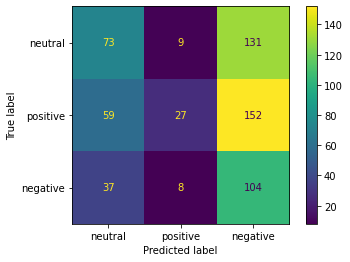

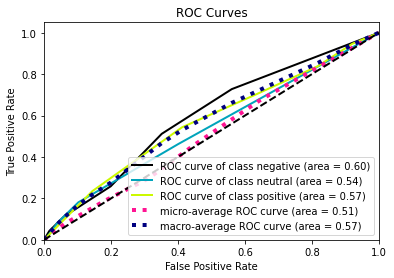


========== Multinomial Naive Bayes ==========
Multinomial Naive Bayes Test Accuracy: 0.5133333333333333
Accuracy score: 0.5133333333333333
F1-score: 0.5007319953972027
Precision-score: 0.4990065231358969
Recall-score: 0.5124096776121042
ROC-AUC-score: 0.6990298372239844
[[152  41  20]
 [ 65  89  84]
 [ 33  49  67]]


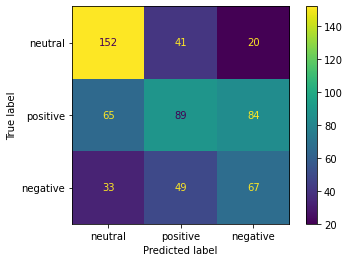

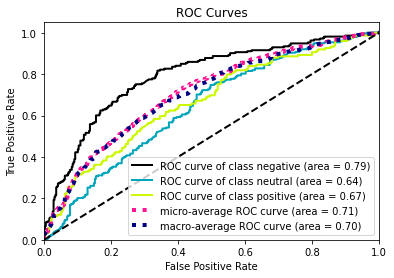

------------------------------------------
Best Accuracy Classifier: Logistic Regression


In [27]:
#@title Bag of Words (Unigram)
#Vectorizing -> Balancing -> Training
sentiment_pipeline_lr = Pipeline([('cv', CountVectorizer(ngram_range=(1,1))),
                              ('smote', SMOTE(random_state=42)),
                              ('lr_model', LogisticRegression())])

sentiment_pipeline_dt = Pipeline([('cv', CountVectorizer(ngram_range=(1,1))),
                              ('smote', SMOTE(random_state=42)),
                              ('dt_model', DecisionTreeClassifier())])

sentiment_pipeline_rf = Pipeline([('cv', CountVectorizer(ngram_range=(1,1))),
                              ('smote', SMOTE(random_state=42)),
                              ('rf_model', RandomForestClassifier())])

sentiment_pipeline_svm = Pipeline([('cv', CountVectorizer(ngram_range=(1,1))),
                               ('smote', SMOTE(random_state=42)),
                               ('svm_model', CalibratedClassifierCV(SGDClassifier()))])

sentiment_pipeline_knn = Pipeline([('cv', CountVectorizer(ngram_range=(1,1))),
                               ('smote', SMOTE(random_state=42)),
                               ('knn_model', KNeighborsClassifier())])

sentiment_pipeline_mnb = Pipeline([('cv', CountVectorizer(ngram_range=(1,1))),
                               ('smote', SMOTE(random_state=42)),
                               ('mnb_model', MultinomialNB())])

#List of Pipelines
pipelines = [sentiment_pipeline_lr, sentiment_pipeline_dt, sentiment_pipeline_rf, sentiment_pipeline_svm, sentiment_pipeline_knn, sentiment_pipeline_mnb]

#Dictionary of Pipelines
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'Random Forest', 3: 'Support Vector Machine (SVM)', 4: 'K-Nearest Neighbour (KNN)', 5: 'Multinomial Naive Bayes'}

start = datetime.now()

#Fit the Pipelines
for pipe in pipelines:
    pipe.fit(X_sentiment_train, y_sentiment_train)
    
stop = datetime.now()
execution_time = stop-start
print("Execution time:", execution_time)

class_names = ['neutral', 'positive', 'negative']

for i, model in enumerate(pipelines):
    sentiment_y_predict_test = model.predict(X_sentiment_test)
    sentiment_y_predict_proba = model.predict_proba(X_sentiment_test)
    print("\n========== {} ==========".format(pipe_dict[i]))
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_sentiment_test,y_sentiment_test)))
    print('Accuracy score:',accuracy_score(y_sentiment_test, sentiment_y_predict_test))
    print('F1-score:',f1_score(y_sentiment_test, sentiment_y_predict_test, average='macro'))
    print('Precision-score:',precision_score(y_sentiment_test, sentiment_y_predict_test, average='macro'))
    print('Recall-score:',recall_score(y_sentiment_test, sentiment_y_predict_test, average='macro'))
    print('ROC-AUC-score:',roc_auc_score(y_sentiment_test, sentiment_y_predict_proba, average='macro', multi_class='ovo'))
    print(confusion_matrix(y_sentiment_test, sentiment_y_predict_test)) 
    
    (ConfusionMatrixDisplay((metrics.confusion_matrix(y_sentiment_test, sentiment_y_predict_test)),display_labels=class_names)).plot()
    skplt.metrics.plot_roc(y_sentiment_test, sentiment_y_predict_proba)
    plt.show()

#Best Accuracy Model    
best_accuracy = 0.0
best_classifier = 0
best_pipeline = ""

print('------------------------------------------')
for i, model in enumerate(pipelines):
    if model.score(X_sentiment_test,y_sentiment_test)>best_accuracy:
        best_accuracy=model.score(X_sentiment_test,y_sentiment_test)
        best_pipeline=model
        best_classifier=i
print('Best Accuracy Classifier: {}'.format(pipe_dict[best_classifier]))

___

Execution time: 0:00:06.401722

========== Logistic Regression ==========
Logistic Regression Test Accuracy: 0.3416666666666667
Accuracy score: 0.3416666666666667
F1-score: 0.3140549257422827
Precision-score: 0.49189534570890503
Recall-score: 0.40111542616227264
ROC-AUC-score: 0.6120394340425145
[[ 37  20 156]
 [ 12  39 187]
 [  7  13 129]]


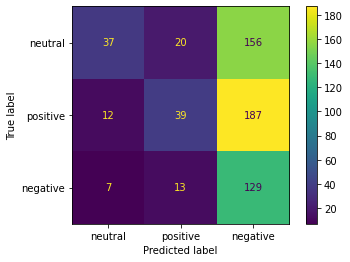

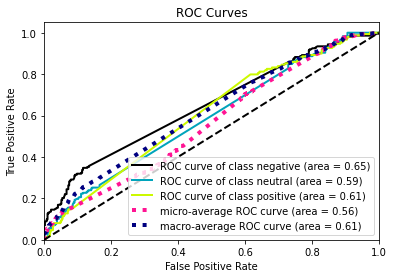


========== Decision Tree ==========
Decision Tree Test Accuracy: 0.345
Accuracy score: 0.345
F1-score: 0.3176365081126986
Precision-score: 0.5431638505454869
Recall-score: 0.40575408409574876
ROC-AUC-score: 0.5835676426413903
[[ 38  10 165]
 [  8  38 192]
 [  7  11 131]]


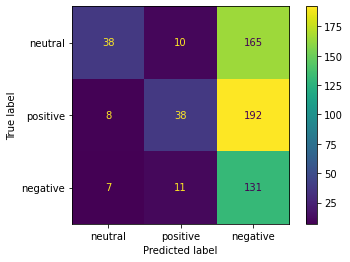

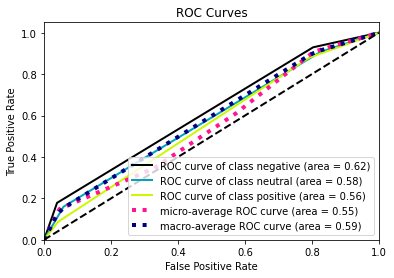


========== Random Forest ==========
Random Forest Test Accuracy: 0.31833333333333336
Accuracy score: 0.31833333333333336
F1-score: 0.2757629636059494
Precision-score: 0.5326621289468708
Recall-score: 0.3853763454526342
ROC-AUC-score: 0.6070712558899477
[[ 30   8 175]
 [  6  26 206]
 [  5   9 135]]


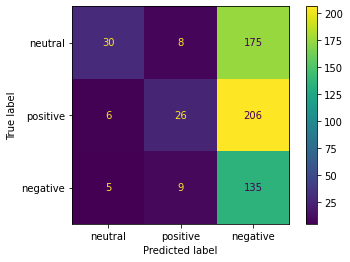

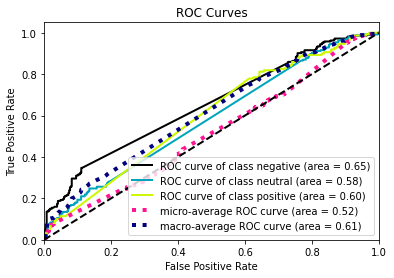


========== Support Vector Machine (SVM) ==========
Support Vector Machine (SVM) Test Accuracy: 0.4
Accuracy score: 0.4
F1-score: 0.39377184444844304
Precision-score: 0.4932160844350695
Recall-score: 0.4448632841925881
ROC-AUC-score: 0.611907429575479
[[ 66  27 120]
 [ 26  57 155]
 [ 15  17 117]]


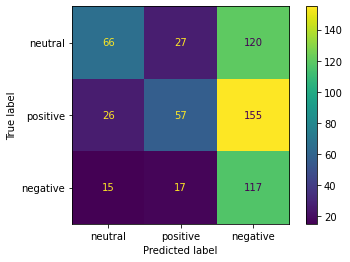

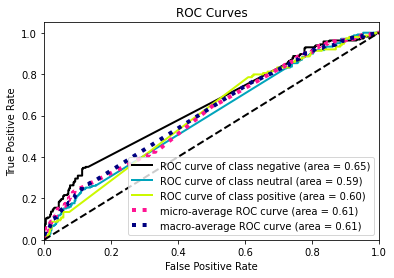


========== K-Nearest Neighbour (KNN) ==========
K-Nearest Neighbour (KNN) Test Accuracy: 0.25166666666666665
Accuracy score: 0.25166666666666665
F1-score: 0.1411372096008215
Precision-score: 0.22604994780374207
Recall-score: 0.3352978775402779
ROC-AUC-score: 0.5234056221347915
[[  0   3 210]
 [  0   3 235]
 [  0   1 148]]


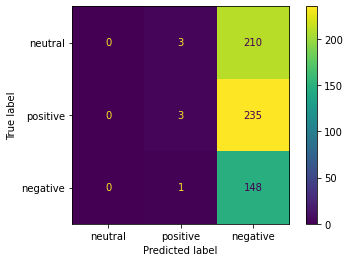

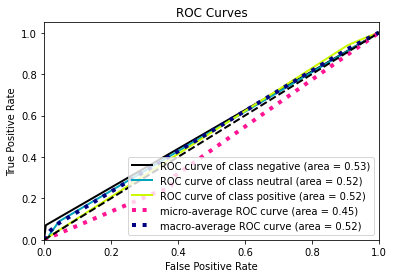


========== Multinomial Naive Bayes ==========
Multinomial Naive Bayes Test Accuracy: 0.4
Accuracy score: 0.4
F1-score: 0.33922887870426316
Precision-score: 0.4142531427775789
Recall-score: 0.38232019656651145
ROC-AUC-score: 0.5993228419073463
[[169  30  14]
 [161  49  28]
 [111  16  22]]


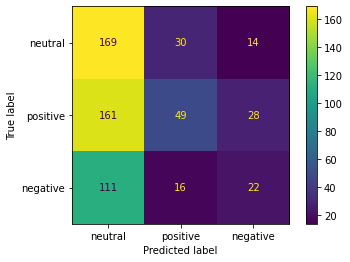

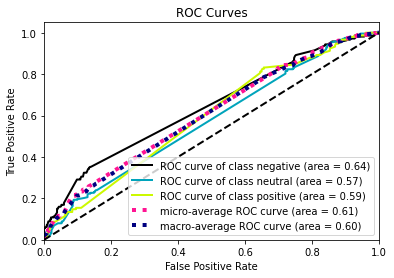

------------------------------------------
Best Accuracy Classifier: Support Vector Machine (SVM)


In [28]:
#@title Bag of Words (Bigram)
#Vectorizing -> Balancing -> Training
sentiment_pipeline_lr = Pipeline([('cv', CountVectorizer(ngram_range=(2,2))),
                              ('smote', SMOTE(random_state=42)),
                              ('lr_model', LogisticRegression())])

sentiment_pipeline_dt = Pipeline([('cv', CountVectorizer(ngram_range=(2,2))),
                              ('smote', SMOTE(random_state=42)),
                              ('dt_model', DecisionTreeClassifier())])

sentiment_pipeline_rf = Pipeline([('cv', CountVectorizer(ngram_range=(2,2))),
                              ('smote', SMOTE(random_state=42)),
                              ('rf_model', RandomForestClassifier())])

sentiment_pipeline_svm = Pipeline([('cv', CountVectorizer(ngram_range=(2,2))),
                               ('smote', SMOTE(random_state=42)),
                               ('svm_model', CalibratedClassifierCV(SGDClassifier()))])

sentiment_pipeline_knn = Pipeline([('cv', CountVectorizer(ngram_range=(2,2))),
                               ('smote', SMOTE(random_state=42)),
                               ('knn_model', KNeighborsClassifier())])

sentiment_pipeline_mnb = Pipeline([('cv', CountVectorizer(ngram_range=(2,2))),
                               ('smote', SMOTE(random_state=42)),
                               ('mnb_model', MultinomialNB())])

#List of Pipelines
pipelines = [sentiment_pipeline_lr, sentiment_pipeline_dt, sentiment_pipeline_rf, sentiment_pipeline_svm, sentiment_pipeline_knn, sentiment_pipeline_mnb]

#Dictionary of Pipelines
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'Random Forest', 3: 'Support Vector Machine (SVM)', 4: 'K-Nearest Neighbour (KNN)', 5: 'Multinomial Naive Bayes'}

start = datetime.now()

#Fit the Pipelines
for pipe in pipelines:
    pipe.fit(X_sentiment_train, y_sentiment_train)
    
stop = datetime.now()
execution_time = stop-start
print("Execution time:", execution_time)

class_names = ['neutral', 'positive', 'negative']

for i, model in enumerate(pipelines):
    sentiment_y_predict_test = model.predict(X_sentiment_test)
    sentiment_y_predict_proba = model.predict_proba(X_sentiment_test)
    print("\n========== {} ==========".format(pipe_dict[i]))
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_sentiment_test,y_sentiment_test)))
    print('Accuracy score:',accuracy_score(y_sentiment_test, sentiment_y_predict_test))
    print('F1-score:',f1_score(y_sentiment_test, sentiment_y_predict_test, average='macro'))
    print('Precision-score:',precision_score(y_sentiment_test, sentiment_y_predict_test, average='macro'))
    print('Recall-score:',recall_score(y_sentiment_test, sentiment_y_predict_test, average='macro'))
    print('ROC-AUC-score:',roc_auc_score(y_sentiment_test, sentiment_y_predict_proba, average='macro', multi_class='ovo'))
    print(confusion_matrix(y_sentiment_test, sentiment_y_predict_test)) 
    
    (ConfusionMatrixDisplay((metrics.confusion_matrix(y_sentiment_test, sentiment_y_predict_test)),display_labels=class_names)).plot()
    skplt.metrics.plot_roc(y_sentiment_test, sentiment_y_predict_proba)
    plt.show()

#Best Accuracy Model    
best_accuracy = 0.0
best_classifier = 0
best_pipeline = ""

print('------------------------------------------')
for i, model in enumerate(pipelines):
    if model.score(X_sentiment_test,y_sentiment_test)>best_accuracy:
        best_accuracy=model.score(X_sentiment_test,y_sentiment_test)
        best_pipeline=model
        best_classifier=i
print('Best Accuracy Classifier: {}'.format(pipe_dict[best_classifier]))

___

Execution time: 0:00:03.487694

========== Logistic Regression ==========
Logistic Regression Test Accuracy: 0.5333333333333333
Accuracy score: 0.5333333333333333
F1-score: 0.5261225965105449
Precision-score: 0.5239045645358414
Recall-score: 0.5317554314790793
ROC-AUC-score: 0.7184394474934
[[142  49  22]
 [ 56 106  76]
 [ 27  50  72]]


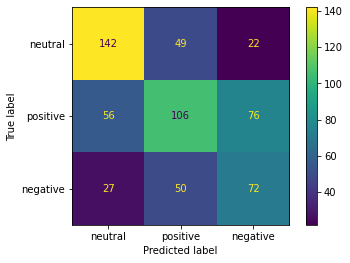

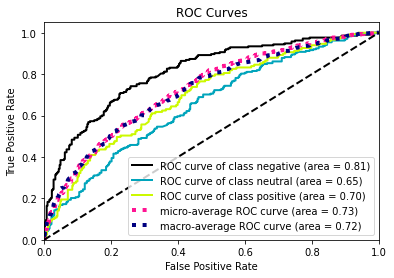


========== Decision Tree ==========
Decision Tree Test Accuracy: 0.5233333333333333
Accuracy score: 0.5233333333333333
F1-score: 0.4952112024401181
Precision-score: 0.5152468210052116
Recall-score: 0.4950110365222436
ROC-AUC-score: 0.6305045917916589
[[107  82  24]
 [ 45 162  31]
 [ 31  73  45]]


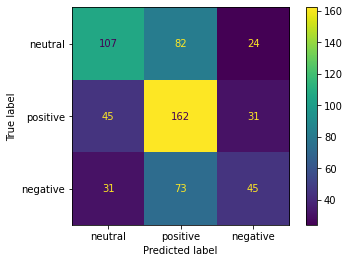

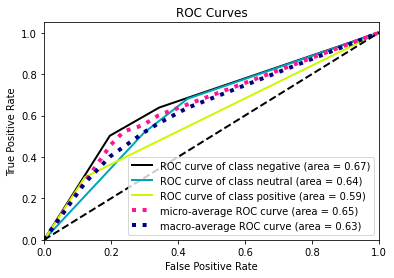


========== Random Forest ==========
Random Forest Test Accuracy: 0.5666666666666667
Accuracy score: 0.5666666666666667
F1-score: 0.5390425218925657
Precision-score: 0.5687446298160145
Recall-score: 0.5360723361090348
ROC-AUC-score: 0.7452684921213026
[[120  75  18]
 [ 34 172  32]
 [ 19  82  48]]


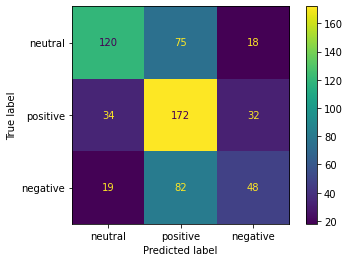

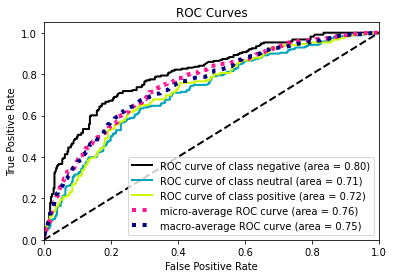


========== Support Vector Machine (SVM) ==========
Support Vector Machine (SVM) Test Accuracy: 0.5433333333333333
Accuracy score: 0.5433333333333333
F1-score: 0.5320884624199814
Precision-score: 0.5314747596961752
Recall-score: 0.5328086428824295
ROC-AUC-score: 0.7100650796916428
[[138  53  22]
 [ 48 124  66]
 [ 30  55  64]]


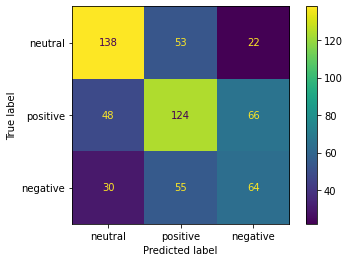

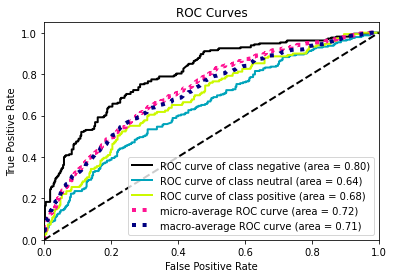


========== K-Nearest Neighbour (KNN) ==========
K-Nearest Neighbour (KNN) Test Accuracy: 0.395
Accuracy score: 0.395
F1-score: 0.39133674053538064
Precision-score: 0.4274610244219856
Recall-score: 0.4124116987753604
ROC-AUC-score: 0.5889660902644449
[[ 57  74  82]
 [ 33  95 110]
 [ 16  48  85]]


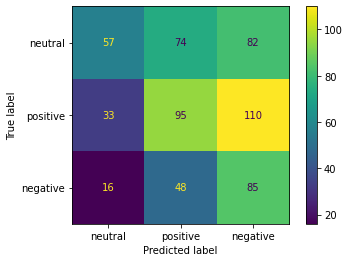

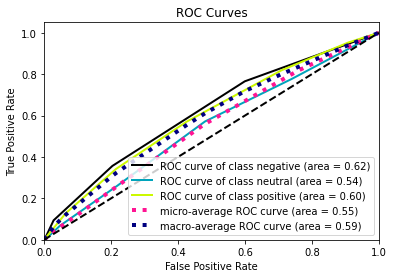


========== Multinomial Naive Bayes ==========
Multinomial Naive Bayes Test Accuracy: 0.5283333333333333
Accuracy score: 0.5283333333333333
F1-score: 0.5155237893040798
Precision-score: 0.5165840091327151
Recall-score: 0.5280176033610974
ROC-AUC-score: 0.7094677994713026
[[155  35  23]
 [ 58  92  88]
 [ 35  44  70]]


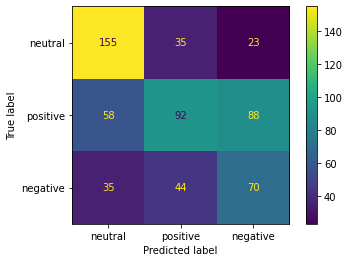

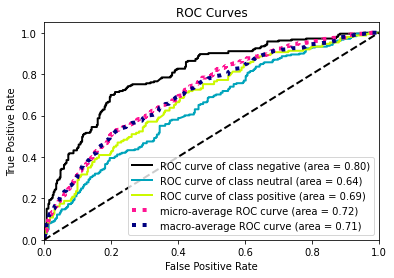

------------------------------------------
Best Accuracy Classifier: Random Forest


In [29]:
#@title TF-IDF (Unigram)
#Vectorizing -> Balancing -> Training
sentiment_pipeline_lr = Pipeline([('cv', TfidfVectorizer(ngram_range=(1,1))),
                              ('smote', SMOTE(random_state=42)),
                              ('lr_model', LogisticRegression())])

sentiment_pipeline_dt = Pipeline([('cv', TfidfVectorizer(ngram_range=(1,1))),
                              ('smote', SMOTE(random_state=42)),
                              ('dt_model', DecisionTreeClassifier())])

sentiment_pipeline_rf = Pipeline([('cv', TfidfVectorizer(ngram_range=(1,1))),
                              ('smote', SMOTE(random_state=42)),
                              ('rf_model', RandomForestClassifier())])

sentiment_pipeline_svm = Pipeline([('cv', TfidfVectorizer(ngram_range=(1,1))),
                               ('smote', SMOTE(random_state=42)),
                               ('svm_model', CalibratedClassifierCV(SGDClassifier()))])

sentiment_pipeline_knn = Pipeline([('cv', TfidfVectorizer(ngram_range=(1,1))),
                               ('smote', SMOTE(random_state=42)),
                               ('knn_model', KNeighborsClassifier())])

sentiment_pipeline_mnb = Pipeline([('cv', TfidfVectorizer(ngram_range=(1,1))),
                               ('smote', SMOTE(random_state=42)),
                               ('mnb_model', MultinomialNB())])

#List of Pipelines
pipelines = [sentiment_pipeline_lr, sentiment_pipeline_dt, sentiment_pipeline_rf, sentiment_pipeline_svm, sentiment_pipeline_knn, sentiment_pipeline_mnb]

#Dictionary of Pipelines
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'Random Forest', 3: 'Support Vector Machine (SVM)', 4: 'K-Nearest Neighbour (KNN)', 5: 'Multinomial Naive Bayes'}

start = datetime.now()

#Fit the Pipelines
for pipe in pipelines:
    pipe.fit(X_sentiment_train, y_sentiment_train)
    
stop = datetime.now()
execution_time = stop-start
print("Execution time:", execution_time)

class_names = ['neutral', 'positive', 'negative']

for i, model in enumerate(pipelines):
    sentiment_y_predict_test = model.predict(X_sentiment_test)
    sentiment_y_predict_proba = model.predict_proba(X_sentiment_test)
    print("\n========== {} ==========".format(pipe_dict[i]))
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_sentiment_test,y_sentiment_test)))
    print('Accuracy score:',accuracy_score(y_sentiment_test, sentiment_y_predict_test))
    print('F1-score:',f1_score(y_sentiment_test, sentiment_y_predict_test, average='macro'))
    print('Precision-score:',precision_score(y_sentiment_test, sentiment_y_predict_test, average='macro'))
    print('Recall-score:',recall_score(y_sentiment_test, sentiment_y_predict_test, average='macro'))
    print('ROC-AUC-score:',roc_auc_score(y_sentiment_test, sentiment_y_predict_proba, average='macro', multi_class='ovo'))
    print(confusion_matrix(y_sentiment_test, sentiment_y_predict_test)) 
    
    (ConfusionMatrixDisplay((metrics.confusion_matrix(y_sentiment_test, sentiment_y_predict_test)),display_labels=class_names)).plot()
    skplt.metrics.plot_roc(y_sentiment_test, sentiment_y_predict_proba)
    plt.show()

#Best Accuracy Model    
best_accuracy = 0.0
best_classifier = 0
best_pipeline = ""

print('------------------------------------------')
for i, model in enumerate(pipelines):
    if model.score(X_sentiment_test,y_sentiment_test)>best_accuracy:
        best_accuracy=model.score(X_sentiment_test,y_sentiment_test)
        best_pipeline=model
        best_classifier=i
print('Best Accuracy Classifier: {}'.format(pipe_dict[best_classifier]))

___

Execution time: 0:00:05.404190

========== Logistic Regression ==========
Logistic Regression Test Accuracy: 0.46
Accuracy score: 0.46
F1-score: 0.39567701342081146
Precision-score: 0.47845454219930533
Recall-score: 0.41597309434534124
ROC-AUC-score: 0.6076670908461693
[[ 67 134  12]
 [ 27 187  24]
 [ 13 114  22]]


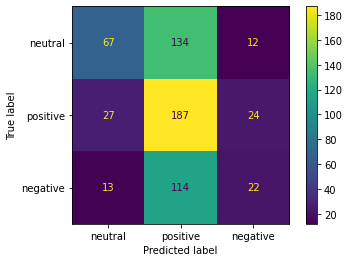

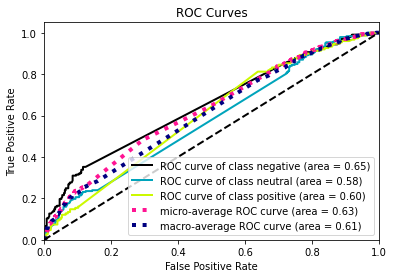


========== Decision Tree ==========
Decision Tree Test Accuracy: 0.4483333333333333
Accuracy score: 0.4483333333333333
F1-score: 0.31819066886773173
Precision-score: 0.5385975863503953
Recall-score: 0.3893611703117772
ROC-AUC-score: 0.5805702420868148
[[ 36 173   4]
 [  7 225   6]
 [  5 136   8]]


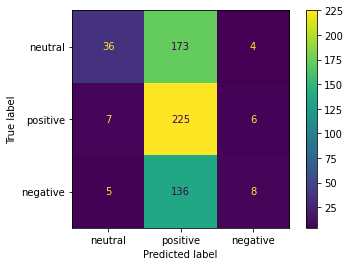

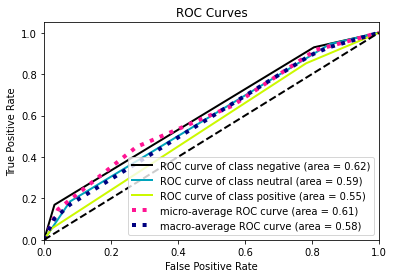


========== Random Forest ==========
Random Forest Test Accuracy: 0.45
Accuracy score: 0.45
F1-score: 0.3254012579879037
Precision-score: 0.5454853620955316
Recall-score: 0.3929426892539163
ROC-AUC-score: 0.6214199263219798
[[ 34 172   7]
 [  6 225   7]
 [  4 134  11]]


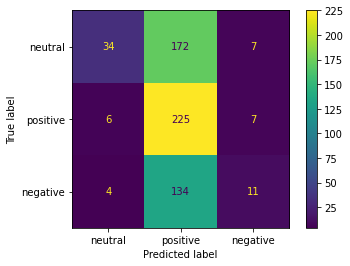

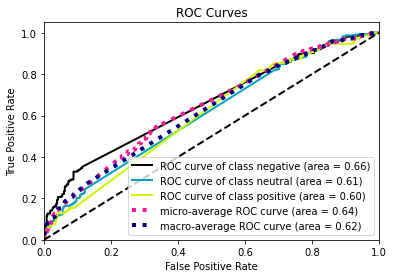


========== Support Vector Machine (SVM) ==========
Support Vector Machine (SVM) Test Accuracy: 0.46166666666666667
Accuracy score: 0.46166666666666667
F1-score: 0.3932369553707345
Precision-score: 0.47966417120666777
Recall-score: 0.4158648870897888
ROC-AUC-score: 0.6119239011734132
[[ 68 135  10]
 [ 27 189  22]
 [ 14 115  20]]


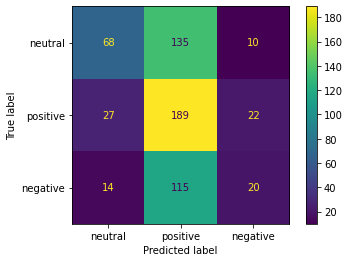

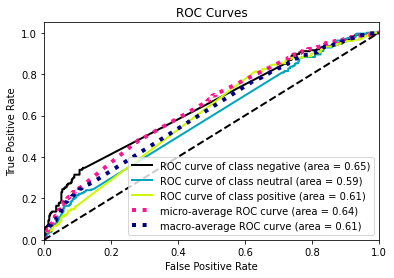


========== K-Nearest Neighbour (KNN) ==========
K-Nearest Neighbour (KNN) Test Accuracy: 0.37833333333333335
Accuracy score: 0.37833333333333335
F1-score: 0.2885745232848303
Precision-score: 0.36458023590048566
Recall-score: 0.34096393070887493
ROC-AUC-score: 0.48735974208191646
[[ 18 147  48]
 [  7 185  46]
 [ 13 112  24]]


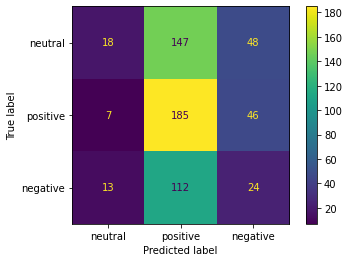

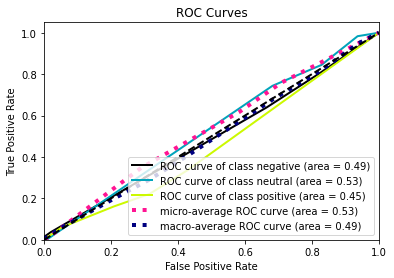


========== Multinomial Naive Bayes ==========
Multinomial Naive Bayes Test Accuracy: 0.4166666666666667
Accuracy score: 0.4166666666666667
F1-score: 0.35365483961842087
Precision-score: 0.4410509247962195
Recall-score: 0.3973121088243723
ROC-AUC-score: 0.6088527480185759
[[175  25  13]
 [161  53  24]
 [110  17  22]]


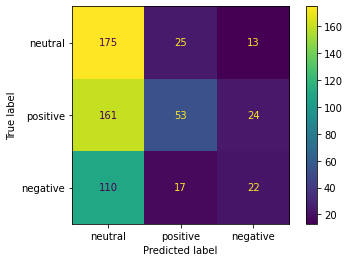

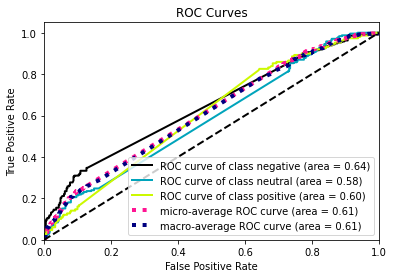

------------------------------------------
Best Accuracy Classifier: Support Vector Machine (SVM)


In [30]:
#@title TF-IDF (Bigram)
#Vectorizing -> Balancing -> Training
sentiment_pipeline_lr = Pipeline([('cv', TfidfVectorizer(ngram_range=(2,2))),
                              ('smote', SMOTE(random_state=42)),
                              ('lr_model', LogisticRegression())])

sentiment_pipeline_dt = Pipeline([('cv', TfidfVectorizer(ngram_range=(2,2))),
                              ('smote', SMOTE(random_state=42)),
                              ('dt_model', DecisionTreeClassifier())])

sentiment_pipeline_rf = Pipeline([('cv', TfidfVectorizer(ngram_range=(2,2))),
                              ('smote', SMOTE(random_state=42)),
                              ('rf_model', RandomForestClassifier())])

sentiment_pipeline_svm = Pipeline([('cv', TfidfVectorizer(ngram_range=(2,2))),
                               ('smote', SMOTE(random_state=42)),
                               ('svm_model', CalibratedClassifierCV(SGDClassifier()))])

sentiment_pipeline_knn = Pipeline([('cv', TfidfVectorizer(ngram_range=(2,2))),
                               ('smote', SMOTE(random_state=42)),
                               ('knn_model', KNeighborsClassifier())])

sentiment_pipeline_mnb = Pipeline([('cv', TfidfVectorizer(ngram_range=(2,2))),
                               ('smote', SMOTE(random_state=42)),
                               ('mnb_model', MultinomialNB())])

#List of Pipelines
pipelines = [sentiment_pipeline_lr, sentiment_pipeline_dt, sentiment_pipeline_rf, sentiment_pipeline_svm, sentiment_pipeline_knn, sentiment_pipeline_mnb]

#Dictionary of Pipelines
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'Random Forest', 3: 'Support Vector Machine (SVM)', 4: 'K-Nearest Neighbour (KNN)', 5: 'Multinomial Naive Bayes'}

start = datetime.now()

#Fit the Pipelines
for pipe in pipelines:
    pipe.fit(X_sentiment_train, y_sentiment_train)
    
stop = datetime.now()
execution_time = stop-start
print("Execution time:", execution_time)

class_names = ['neutral', 'positive', 'negative']

for i, model in enumerate(pipelines):
    sentiment_y_predict_test = model.predict(X_sentiment_test)
    sentiment_y_predict_proba = model.predict_proba(X_sentiment_test)
    print("\n========== {} ==========".format(pipe_dict[i]))
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_sentiment_test,y_sentiment_test)))
    print('Accuracy score:',accuracy_score(y_sentiment_test, sentiment_y_predict_test))
    print('F1-score:',f1_score(y_sentiment_test, sentiment_y_predict_test, average='macro'))
    print('Precision-score:',precision_score(y_sentiment_test, sentiment_y_predict_test, average='macro'))
    print('Recall-score:',recall_score(y_sentiment_test, sentiment_y_predict_test, average='macro'))
    print('ROC-AUC-score:',roc_auc_score(y_sentiment_test, sentiment_y_predict_proba, average='macro', multi_class='ovo'))
    print(confusion_matrix(y_sentiment_test, sentiment_y_predict_test)) 
    
    (ConfusionMatrixDisplay((metrics.confusion_matrix(y_sentiment_test, sentiment_y_predict_test)),display_labels=class_names)).plot()
    skplt.metrics.plot_roc(y_sentiment_test, sentiment_y_predict_proba)
    plt.show()

#Best Accuracy Model    
best_accuracy = 0.0
best_classifier = 0
best_pipeline = ""

print('------------------------------------------')
for i, model in enumerate(pipelines):
    if model.score(X_sentiment_test,y_sentiment_test)>best_accuracy:
        best_accuracy=model.score(X_sentiment_test,y_sentiment_test)
        best_pipeline=model
        best_classifier=i
print('Best Accuracy Classifier: {}'.format(pipe_dict[best_classifier]))

___

In [31]:
#@title Hyperparameter Tuning (GridSearchCV)
#TF-IDF (Unigram) - Random Forest

sentiment_pipeline_rf = Pipeline([('cv', TfidfVectorizer(ngram_range=(1,1))),
                              ('smote', SMOTE(random_state=42)),
                              ('rf_model', RandomForestClassifier())])

param_grid = [{'rf_model__n_estimators': [50,100,200]}]

start = datetime.now()

grid_search = GridSearchCV(sentiment_pipeline_rf, param_grid, cv=3, verbose=True)
sentiment_best_model = grid_search.fit(X_sentiment_train, y_sentiment_train)

stop = datetime.now()
execution_time = stop-start 
print("Execution time:", execution_time)

print("Best score:", grid_search.best_score_)
print("Best params:", grid_search.best_params_)
print(sentiment_best_model.best_estimator_)
print("The mean accuracy of the model is:",sentiment_best_model.score(X_sentiment_test,y_sentiment_test))
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Execution time: 0:00:13.454912
Best score: 0.5637500000000001
Best params: {'rf_model__n_estimators': 50}
Pipeline(steps=[('cv', TfidfVectorizer()), ('smote', SMOTE(random_state=42)),
                ('rf_model', RandomForestClassifier(n_estimators=50))])
The mean accuracy of the model is: 0.5633333333333334
0.5637500000000001 {'rf_model__n_estimators': 50}
0.55875 {'rf_model__n_estimators': 100}
0.5566666666666666 {'rf_model__n_estimators': 200}


___

Execution time: 0:00:01.038342

========== Random Forest ==========
Random Forest Test Accuracy: 0.5516666666666666
Accuracy score: 0.5516666666666666
F1-score: 0.5308986953936439
Precision-score: 0.5580558966916006
Recall-score: 0.5268429015113624
ROC-AUC-score: 0.7420958174365313
[[110  84  19]
 [ 38 167  33]
 [ 21  74  54]]


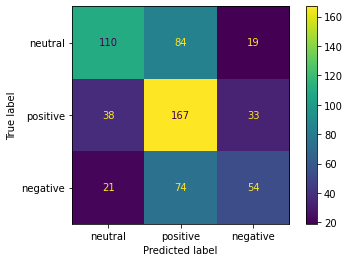

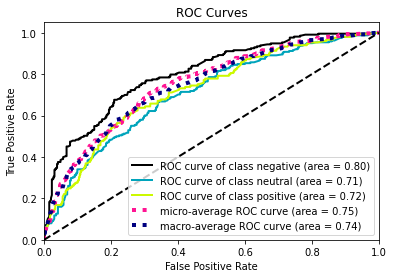

------------------------------------------
Best Accuracy Classifier: Random Forest


In [32]:
#@title Save Best Model (Sentiment - TFIDF - Unigram - RF)
sentiment_pipeline_rf = Pipeline([('cv', TfidfVectorizer(ngram_range=(1,1))),
                              ('smote', SMOTE(random_state=42)),
                              ('rf_model', RandomForestClassifier(n_estimators=50))])

#List of Pipelines
pipelines = [sentiment_pipeline_rf]

#Dictionary of Pipelines
pipe_dict = {0: 'Random Forest'}

start = datetime.now()

#Fit the Pipelines
for pipe in pipelines:
    pipe.fit(X_sentiment_train, y_sentiment_train)
    
stop = datetime.now()
execution_time = stop-start
print("Execution time:", execution_time)

class_names = ['neutral', 'positive', 'negative']

for i, model in enumerate(pipelines):
    sentiment_y_predict_test = model.predict(X_sentiment_test)
    sentiment_y_predict_proba = model.predict_proba(X_sentiment_test)
    print("\n========== {} ==========".format(pipe_dict[i]))
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_sentiment_test,y_sentiment_test)))
    print('Accuracy score:',accuracy_score(y_sentiment_test, sentiment_y_predict_test))
    print('F1-score:',f1_score(y_sentiment_test, sentiment_y_predict_test, average='macro'))
    print('Precision-score:',precision_score(y_sentiment_test, sentiment_y_predict_test, average='macro'))
    print('Recall-score:',recall_score(y_sentiment_test, sentiment_y_predict_test, average='macro'))
    print('ROC-AUC-score:',roc_auc_score(y_sentiment_test, sentiment_y_predict_proba, average='macro', multi_class='ovo'))
    print(confusion_matrix(y_sentiment_test, sentiment_y_predict_test)) 
    
    (ConfusionMatrixDisplay((metrics.confusion_matrix(y_sentiment_test, sentiment_y_predict_test)),display_labels=class_names)).plot()
    skplt.metrics.plot_roc(y_sentiment_test, sentiment_y_predict_proba)
    plt.show()

#Best Accuracy Model    
best_accuracy = 0.0
best_classifier = 0
best_pipeline = ""

print('------------------------------------------')
for i, model in enumerate(pipelines):
    if model.score(X_sentiment_test,y_sentiment_test)>best_accuracy:
        best_accuracy=model.score(X_sentiment_test,y_sentiment_test)
        best_pipeline=model
        best_classifier=i
print('Best Accuracy Classifier: {}'.format(pipe_dict[best_classifier]))

model_file = open("malay_sentiment_rf.pkl","wb")
joblib.dump(sentiment_pipeline_svm,model_file)
model_file.close()

___

# Emotion (Multilabel)

In [33]:
#@title Bag of Words (Unigram)
#Vectorizing -> Balancing -> Training
#https://github.com/nkartik94/Multi-Label-Text-Classification/blob/master/Mark_6.ipynb
emotion_pipeline_lr = Pipeline([('cv', CountVectorizer(ngram_range=(1,1))),
                                ('smote', SMOTE(random_state=42)),
                                ('lr_model', LogisticRegression())])

emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

for label in emotion:
  print('\n..........Processing Tweets of {} Emotion..........'.format(label))
  emotion_pipeline_lr.fit(X_emotion_train, train[label])

  y_pred_X = emotion_pipeline_lr.predict(X_emotion_test)
  print('Accuracy score:',accuracy_score(test[label], y_pred_X))


..........Processing Tweets of anger Emotion..........
Accuracy score: 0.6740331491712708

..........Processing Tweets of anticipation Emotion..........
Accuracy score: 0.6132596685082873

..........Processing Tweets of disgust Emotion..........
Accuracy score: 0.6988950276243094

..........Processing Tweets of fear Emotion..........
Accuracy score: 0.649171270718232

..........Processing Tweets of joy Emotion..........
Accuracy score: 0.574585635359116

..........Processing Tweets of sadness Emotion..........
Accuracy score: 0.6685082872928176

..........Processing Tweets of surprise Emotion..........
Accuracy score: 0.6187845303867403

..........Processing Tweets of trust Emotion..........
Accuracy score: 0.6243093922651933


In [34]:
emotion_pipeline_dt = Pipeline([('cv', CountVectorizer(ngram_range=(1,1))),
                                ('smote', SMOTE(random_state=42)),
                                ('dt_model', DecisionTreeClassifier())])

emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

for label in emotion:
  print('\n..........Processing Tweets of {} Emotion..........'.format(label))
  emotion_pipeline_dt.fit(X_emotion_train, train[label])

  y_pred_X = emotion_pipeline_dt.predict(X_emotion_test)
  print('Accuracy score:',accuracy_score(test[label], y_pred_X))


..........Processing Tweets of anger Emotion..........
Accuracy score: 0.6519337016574586

..........Processing Tweets of anticipation Emotion..........
Accuracy score: 0.5966850828729282

..........Processing Tweets of disgust Emotion..........
Accuracy score: 0.6657458563535912

..........Processing Tweets of fear Emotion..........
Accuracy score: 0.6878453038674033

..........Processing Tweets of joy Emotion..........
Accuracy score: 0.5966850828729282

..........Processing Tweets of sadness Emotion..........
Accuracy score: 0.580110497237569

..........Processing Tweets of surprise Emotion..........
Accuracy score: 0.569060773480663

..........Processing Tweets of trust Emotion..........
Accuracy score: 0.6022099447513812


In [35]:
emotion_pipeline_rf = Pipeline([('cv', CountVectorizer(ngram_range=(1,1))),
                                ('smote', SMOTE(random_state=42)),
                                ('rf_model', RandomForestClassifier())])

emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

for label in emotion:
  print('\n..........Processing Tweets of {} Emotion..........'.format(label))
  emotion_pipeline_rf.fit(X_emotion_train, train[label])

  y_pred_X = emotion_pipeline_rf.predict(X_emotion_test)
  print('Accuracy score:',accuracy_score(test[label], y_pred_X))


..........Processing Tweets of anger Emotion..........
Accuracy score: 0.6574585635359116

..........Processing Tweets of anticipation Emotion..........
Accuracy score: 0.5773480662983426

..........Processing Tweets of disgust Emotion..........
Accuracy score: 0.6629834254143646

..........Processing Tweets of fear Emotion..........
Accuracy score: 0.6408839779005525

..........Processing Tweets of joy Emotion..........
Accuracy score: 0.569060773480663

..........Processing Tweets of sadness Emotion..........
Accuracy score: 0.6325966850828729

..........Processing Tweets of surprise Emotion..........
Accuracy score: 0.574585635359116

..........Processing Tweets of trust Emotion..........
Accuracy score: 0.5966850828729282


In [36]:
emotion_pipeline_svm = Pipeline([('cv', CountVectorizer(ngram_range=(1,1))),
                                 ('smote', SMOTE(random_state=42)),
                                 ('svm_model', CalibratedClassifierCV(SGDClassifier()))])

emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

for label in emotion:
  print('\n..........Processing Tweets of {} Emotion..........'.format(label))
  emotion_pipeline_svm.fit(X_emotion_train, train[label])

  y_pred_X = emotion_pipeline_svm.predict(X_emotion_test)
  print('Accuracy score:',accuracy_score(test[label], y_pred_X))


..........Processing Tweets of anger Emotion..........
Accuracy score: 0.7209944751381215

..........Processing Tweets of anticipation Emotion..........
Accuracy score: 0.6353591160220995

..........Processing Tweets of disgust Emotion..........
Accuracy score: 0.7375690607734806

..........Processing Tweets of fear Emotion..........
Accuracy score: 0.7154696132596685

..........Processing Tweets of joy Emotion..........
Accuracy score: 0.6132596685082873

..........Processing Tweets of sadness Emotion..........
Accuracy score: 0.6823204419889503

..........Processing Tweets of surprise Emotion..........
Accuracy score: 0.6353591160220995

..........Processing Tweets of trust Emotion..........
Accuracy score: 0.6049723756906077


In [37]:
emotion_pipeline_knn = Pipeline([('cv', CountVectorizer(ngram_range=(1,1))),
                                 ('smote', SMOTE(random_state=42)),
                                 ('knn_model', KNeighborsClassifier())])

emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

for label in emotion:
  print('\n..........Processing Tweets of {} Emotion..........'.format(label))
  emotion_pipeline_knn.fit(X_emotion_train, train[label])

  y_pred_X = emotion_pipeline_knn.predict(X_emotion_test)
  print('Accuracy score:',accuracy_score(test[label], y_pred_X))


..........Processing Tweets of anger Emotion..........
Accuracy score: 0.3370165745856354

..........Processing Tweets of anticipation Emotion..........
Accuracy score: 0.39226519337016574

..........Processing Tweets of disgust Emotion..........
Accuracy score: 0.20718232044198895

..........Processing Tweets of fear Emotion..........
Accuracy score: 0.2983425414364641

..........Processing Tweets of joy Emotion..........
Accuracy score: 0.34806629834254144

..........Processing Tweets of sadness Emotion..........
Accuracy score: 0.39779005524861877

..........Processing Tweets of surprise Emotion..........
Accuracy score: 0.27071823204419887

..........Processing Tweets of trust Emotion..........
Accuracy score: 0.4696132596685083


In [38]:
emotion_pipeline_mnb = Pipeline([('cv', CountVectorizer(ngram_range=(1,1))),
                                 ('smote', SMOTE(random_state=42)),
                                 ('mnb_model', MultinomialNB())])

emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

for label in emotion:
  print('\n..........Processing Tweets of {} Emotion..........'.format(label))
  emotion_pipeline_mnb.fit(X_emotion_train, train[label])

  y_pred_X = emotion_pipeline_mnb.predict(X_emotion_test)
  print('Accuracy score:',accuracy_score(test[label], y_pred_X))


..........Processing Tweets of anger Emotion..........
Accuracy score: 0.7651933701657458

..........Processing Tweets of anticipation Emotion..........
Accuracy score: 0.6850828729281768

..........Processing Tweets of disgust Emotion..........
Accuracy score: 0.7845303867403315

..........Processing Tweets of fear Emotion..........
Accuracy score: 0.6740331491712708

..........Processing Tweets of joy Emotion..........
Accuracy score: 0.6519337016574586

..........Processing Tweets of sadness Emotion..........
Accuracy score: 0.712707182320442

..........Processing Tweets of surprise Emotion..........
Accuracy score: 0.6878453038674033

..........Processing Tweets of trust Emotion..........
Accuracy score: 0.649171270718232


___

In [39]:
#@title Bag of Words (Bigram)
#Vectorizing -> Balancing -> Training
#https://github.com/nkartik94/Multi-Label-Text-Classification/blob/master/Mark_6.ipynb
emotion_pipeline_lr = Pipeline([('cv', CountVectorizer(ngram_range=(2,2))),
                                ('smote', SMOTE(random_state=42)),
                                ('lr_model', LogisticRegression())])

emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

for label in emotion:
  print('\n..........Processing Tweets of {} Emotion..........'.format(label))
  emotion_pipeline_lr.fit(X_emotion_train, train[label])

  y_pred_X = emotion_pipeline_lr.predict(X_emotion_test)
  print('Accuracy score:',accuracy_score(test[label], y_pred_X))


..........Processing Tweets of anger Emotion..........
Accuracy score: 0.3729281767955801

..........Processing Tweets of anticipation Emotion..........
Accuracy score: 0.4696132596685083

..........Processing Tweets of disgust Emotion..........
Accuracy score: 0.26519337016574585

..........Processing Tweets of fear Emotion..........
Accuracy score: 0.3370165745856354

..........Processing Tweets of joy Emotion..........
Accuracy score: 0.40331491712707185

..........Processing Tweets of sadness Emotion..........
Accuracy score: 0.4447513812154696

..........Processing Tweets of surprise Emotion..........
Accuracy score: 0.32044198895027626

..........Processing Tweets of trust Emotion..........
Accuracy score: 0.5138121546961326


In [40]:
emotion_pipeline_dt = Pipeline([('cv', CountVectorizer(ngram_range=(2,2))),
                                ('smote', SMOTE(random_state=42)),
                                ('dt_model', DecisionTreeClassifier())])

emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

for label in emotion:
  print('\n..........Processing Tweets of {} Emotion..........'.format(label))
  emotion_pipeline_dt.fit(X_emotion_train, train[label])

  y_pred_X = emotion_pipeline_dt.predict(X_emotion_test)
  print('Accuracy score:',accuracy_score(test[label], y_pred_X))


..........Processing Tweets of anger Emotion..........
Accuracy score: 0.3839779005524862

..........Processing Tweets of anticipation Emotion..........
Accuracy score: 0.44751381215469616

..........Processing Tweets of disgust Emotion..........
Accuracy score: 0.3011049723756906

..........Processing Tweets of fear Emotion..........
Accuracy score: 0.3756906077348066

..........Processing Tweets of joy Emotion..........
Accuracy score: 0.4005524861878453

..........Processing Tweets of sadness Emotion..........
Accuracy score: 0.44751381215469616

..........Processing Tweets of surprise Emotion..........
Accuracy score: 0.32320441988950277

..........Processing Tweets of trust Emotion..........
Accuracy score: 0.494475138121547


In [41]:
emotion_pipeline_rf = Pipeline([('cv', CountVectorizer(ngram_range=(2,2))),
                                ('smote', SMOTE(random_state=42)),
                                ('rf_model', RandomForestClassifier())])

emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

for label in emotion:
  print('\n..........Processing Tweets of {} Emotion..........'.format(label))
  emotion_pipeline_rf.fit(X_emotion_train, train[label])

  y_pred_X = emotion_pipeline_rf.predict(X_emotion_test)
  print('Accuracy score:',accuracy_score(test[label], y_pred_X))


..........Processing Tweets of anger Emotion..........
Accuracy score: 0.34806629834254144

..........Processing Tweets of anticipation Emotion..........
Accuracy score: 0.43922651933701656

..........Processing Tweets of disgust Emotion..........
Accuracy score: 0.26243093922651933

..........Processing Tweets of fear Emotion..........
Accuracy score: 0.3425414364640884

..........Processing Tweets of joy Emotion..........
Accuracy score: 0.39226519337016574

..........Processing Tweets of sadness Emotion..........
Accuracy score: 0.4143646408839779

..........Processing Tweets of surprise Emotion..........
Accuracy score: 0.31767955801104975

..........Processing Tweets of trust Emotion..........
Accuracy score: 0.4889502762430939


In [42]:
emotion_pipeline_svm = Pipeline([('cv', CountVectorizer(ngram_range=(2,2))),
                                 ('smote', SMOTE(random_state=42)),
                                 ('svm_model', CalibratedClassifierCV(SGDClassifier()))])

emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

for label in emotion:
  print('\n..........Processing Tweets of {} Emotion..........'.format(label))
  emotion_pipeline_svm.fit(X_emotion_train, train[label])

  y_pred_X = emotion_pipeline_svm.predict(X_emotion_test)
  print('Accuracy score:',accuracy_score(test[label], y_pred_X))


..........Processing Tweets of anger Emotion..........
Accuracy score: 0.44751381215469616

..........Processing Tweets of anticipation Emotion..........
Accuracy score: 0.4972375690607735

..........Processing Tweets of disgust Emotion..........
Accuracy score: 0.4116022099447514

..........Processing Tweets of fear Emotion..........
Accuracy score: 0.4972375690607735

..........Processing Tweets of joy Emotion..........
Accuracy score: 0.47790055248618785

..........Processing Tweets of sadness Emotion..........
Accuracy score: 0.511049723756906

..........Processing Tweets of surprise Emotion..........
Accuracy score: 0.39226519337016574

..........Processing Tweets of trust Emotion..........
Accuracy score: 0.505524861878453


In [43]:
emotion_pipeline_knn = Pipeline([('cv', CountVectorizer(ngram_range=(2,2))),
                                 ('smote', SMOTE(random_state=42)),
                                 ('knn_model', KNeighborsClassifier())])

emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

for label in emotion:
  print('\n..........Processing Tweets of {} Emotion..........'.format(label))
  emotion_pipeline_knn.fit(X_emotion_train, train[label])

  y_pred_X = emotion_pipeline_knn.predict(X_emotion_test)
  print('Accuracy score:',accuracy_score(test[label], y_pred_X))


..........Processing Tweets of anger Emotion..........
Accuracy score: 0.30662983425414364

..........Processing Tweets of anticipation Emotion..........
Accuracy score: 0.3839779005524862

..........Processing Tweets of disgust Emotion..........
Accuracy score: 0.1685082872928177

..........Processing Tweets of fear Emotion..........
Accuracy score: 0.27071823204419887

..........Processing Tweets of joy Emotion..........
Accuracy score: 0.3397790055248619

..........Processing Tweets of sadness Emotion..........
Accuracy score: 0.3701657458563536

..........Processing Tweets of surprise Emotion..........
Accuracy score: 0.26243093922651933

..........Processing Tweets of trust Emotion..........
Accuracy score: 0.47790055248618785


In [44]:
emotion_pipeline_mnb = Pipeline([('cv', CountVectorizer(ngram_range=(2,2))),
                                 ('smote', SMOTE(random_state=42)),
                                 ('mnb_model', MultinomialNB())])

emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

for label in emotion:
  print('\n..........Processing Tweets of {} Emotion..........'.format(label))
  emotion_pipeline_mnb.fit(X_emotion_train, train[label])

  y_pred_X = emotion_pipeline_mnb.predict(X_emotion_test)
  print('Accuracy score:',accuracy_score(test[label], y_pred_X))


..........Processing Tweets of anger Emotion..........
Accuracy score: 0.7265193370165746

..........Processing Tweets of anticipation Emotion..........
Accuracy score: 0.6464088397790055

..........Processing Tweets of disgust Emotion..........
Accuracy score: 0.8121546961325967

..........Processing Tweets of fear Emotion..........
Accuracy score: 0.4972375690607735

..........Processing Tweets of joy Emotion..........
Accuracy score: 0.6602209944751382

..........Processing Tweets of sadness Emotion..........
Accuracy score: 0.6823204419889503

..........Processing Tweets of surprise Emotion..........
Accuracy score: 0.7099447513812155

..........Processing Tweets of trust Emotion..........
Accuracy score: 0.569060773480663


___

In [45]:
#@title TF-IDF (Unigram)
#Vectorizing -> Balancing -> Training
#https://github.com/nkartik94/Multi-Label-Text-Classification/blob/master/Mark_6.ipynb
emotion_pipeline_lr = Pipeline([('cv', TfidfVectorizer(ngram_range=(1,1))),
                                ('smote', SMOTE(random_state=42)),
                                ('lr_model', LogisticRegression())])

emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

for label in emotion:
  print('\n..........Processing Tweets of {} Emotion..........'.format(label))
  emotion_pipeline_lr.fit(X_emotion_train, train[label])

  y_pred_X = emotion_pipeline_lr.predict(X_emotion_test)
  print('Accuracy score:',accuracy_score(test[label], y_pred_X))


..........Processing Tweets of anger Emotion..........
Accuracy score: 0.7900552486187845

..........Processing Tweets of anticipation Emotion..........
Accuracy score: 0.6519337016574586

..........Processing Tweets of disgust Emotion..........
Accuracy score: 0.856353591160221

..........Processing Tweets of fear Emotion..........
Accuracy score: 0.7044198895027625

..........Processing Tweets of joy Emotion..........
Accuracy score: 0.6823204419889503

..........Processing Tweets of sadness Emotion..........
Accuracy score: 0.7237569060773481

..........Processing Tweets of surprise Emotion..........
Accuracy score: 0.7237569060773481

..........Processing Tweets of trust Emotion..........
Accuracy score: 0.6574585635359116


In [46]:
emotion_pipeline_dt = Pipeline([('cv', TfidfVectorizer(ngram_range=(1,1))),
                                ('smote', SMOTE(random_state=42)),
                                ('dt_model', DecisionTreeClassifier())])

emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

for label in emotion:
  print('\n..........Processing Tweets of {} Emotion..........'.format(label))
  emotion_pipeline_dt.fit(X_emotion_train, train[label])

  y_pred_X = emotion_pipeline_dt.predict(X_emotion_test)
  print('Accuracy score:',accuracy_score(test[label], y_pred_X))


..........Processing Tweets of anger Emotion..........
Accuracy score: 0.7651933701657458

..........Processing Tweets of anticipation Emotion..........
Accuracy score: 0.6685082872928176

..........Processing Tweets of disgust Emotion..........
Accuracy score: 0.8176795580110497

..........Processing Tweets of fear Emotion..........
Accuracy score: 0.6988950276243094

..........Processing Tweets of joy Emotion..........
Accuracy score: 0.6933701657458563

..........Processing Tweets of sadness Emotion..........
Accuracy score: 0.7292817679558011

..........Processing Tweets of surprise Emotion..........
Accuracy score: 0.7541436464088398

..........Processing Tweets of trust Emotion..........
Accuracy score: 0.6408839779005525


In [47]:
emotion_pipeline_rf = Pipeline([('cv', TfidfVectorizer(ngram_range=(1,1))),
                                ('smote', SMOTE(random_state=42)),
                                ('rf_model', RandomForestClassifier())])

emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

for label in emotion:
  print('\n..........Processing Tweets of {} Emotion..........'.format(label))
  emotion_pipeline_rf.fit(X_emotion_train, train[label])

  y_pred_X = emotion_pipeline_rf.predict(X_emotion_test)
  print('Accuracy score:',accuracy_score(test[label], y_pred_X))


..........Processing Tweets of anger Emotion..........
Accuracy score: 0.8204419889502762

..........Processing Tweets of anticipation Emotion..........
Accuracy score: 0.7182320441988951

..........Processing Tweets of disgust Emotion..........
Accuracy score: 0.8895027624309392

..........Processing Tweets of fear Emotion..........
Accuracy score: 0.7182320441988951

..........Processing Tweets of joy Emotion..........
Accuracy score: 0.7513812154696132

..........Processing Tweets of sadness Emotion..........
Accuracy score: 0.7541436464088398

..........Processing Tweets of surprise Emotion..........
Accuracy score: 0.7762430939226519

..........Processing Tweets of trust Emotion..........
Accuracy score: 0.6712707182320442


In [48]:
emotion_pipeline_svm = Pipeline([('cv', TfidfVectorizer(ngram_range=(1,1))),
                                 ('smote', SMOTE(random_state=42)),
                                 ('svm_model', CalibratedClassifierCV(SGDClassifier()))])

emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

for label in emotion:
  print('\n..........Processing Tweets of {} Emotion..........'.format(label))
  emotion_pipeline_svm.fit(X_emotion_train, train[label])

  y_pred_X = emotion_pipeline_svm.predict(X_emotion_test)
  print('Accuracy score:',accuracy_score(test[label], y_pred_X))


..........Processing Tweets of anger Emotion..........
Accuracy score: 0.7679558011049724

..........Processing Tweets of anticipation Emotion..........
Accuracy score: 0.6298342541436464

..........Processing Tweets of disgust Emotion..........
Accuracy score: 0.8701657458563536

..........Processing Tweets of fear Emotion..........
Accuracy score: 0.7375690607734806

..........Processing Tweets of joy Emotion..........
Accuracy score: 0.6657458563535912

..........Processing Tweets of sadness Emotion..........
Accuracy score: 0.7430939226519337

..........Processing Tweets of surprise Emotion..........
Accuracy score: 0.7099447513812155

..........Processing Tweets of trust Emotion..........
Accuracy score: 0.6353591160220995


In [49]:
emotion_pipeline_knn = Pipeline([('cv', TfidfVectorizer(ngram_range=(1,1))),
                                 ('smote', SMOTE(random_state=42)),
                                 ('knn_model', KNeighborsClassifier())])

emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

for label in emotion:
  print('\n..........Processing Tweets of {} Emotion..........'.format(label))
  emotion_pipeline_knn.fit(X_emotion_train, train[label])

  y_pred_X = emotion_pipeline_knn.predict(X_emotion_test)
  print('Accuracy score:',accuracy_score(test[label], y_pred_X))


..........Processing Tweets of anger Emotion..........
Accuracy score: 0.7099447513812155

..........Processing Tweets of anticipation Emotion..........
Accuracy score: 0.5386740331491713

..........Processing Tweets of disgust Emotion..........
Accuracy score: 0.8314917127071824

..........Processing Tweets of fear Emotion..........
Accuracy score: 0.4723756906077348

..........Processing Tweets of joy Emotion..........
Accuracy score: 0.45027624309392267

..........Processing Tweets of sadness Emotion..........
Accuracy score: 0.6519337016574586

..........Processing Tweets of surprise Emotion..........
Accuracy score: 0.31767955801104975

..........Processing Tweets of trust Emotion..........
Accuracy score: 0.4889502762430939


In [50]:
emotion_pipeline_mnb = Pipeline([('cv', TfidfVectorizer(ngram_range=(1,1))),
                                 ('smote', SMOTE(random_state=42)),
                                 ('mnb_model', MultinomialNB())])

emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

for label in emotion:
  print('\n..........Processing Tweets of {} Emotion..........'.format(label))
  emotion_pipeline_mnb.fit(X_emotion_train, train[label])

  y_pred_X = emotion_pipeline_mnb.predict(X_emotion_test)
  print('Accuracy score:',accuracy_score(test[label], y_pred_X))


..........Processing Tweets of anger Emotion..........
Accuracy score: 0.7292817679558011

..........Processing Tweets of anticipation Emotion..........
Accuracy score: 0.6712707182320442

..........Processing Tweets of disgust Emotion..........
Accuracy score: 0.7375690607734806

..........Processing Tweets of fear Emotion..........
Accuracy score: 0.6657458563535912

..........Processing Tweets of joy Emotion..........
Accuracy score: 0.649171270718232

..........Processing Tweets of sadness Emotion..........
Accuracy score: 0.7209944751381215

..........Processing Tweets of surprise Emotion..........
Accuracy score: 0.6906077348066298

..........Processing Tweets of trust Emotion..........
Accuracy score: 0.6519337016574586


___

In [51]:
#@title TF-IDF (Bigram)
#Vectorizing -> Balancing -> Training
#https://github.com/nkartik94/Multi-Label-Text-Classification/blob/master/Mark_6.ipynb
emotion_pipeline_lr = Pipeline([('cv', TfidfVectorizer(ngram_range=(2,2))),
                                ('smote', SMOTE(random_state=42)),
                                ('lr_model', LogisticRegression())])

emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

for label in emotion:
  print('\n..........Processing Tweets of {} Emotion..........'.format(label))
  emotion_pipeline_lr.fit(X_emotion_train, train[label])

  y_pred_X = emotion_pipeline_lr.predict(X_emotion_test)
  print('Accuracy score:',accuracy_score(test[label], y_pred_X))


..........Processing Tweets of anger Emotion..........
Accuracy score: 0.7209944751381215

..........Processing Tweets of anticipation Emotion..........
Accuracy score: 0.6574585635359116

..........Processing Tweets of disgust Emotion..........
Accuracy score: 0.850828729281768

..........Processing Tweets of fear Emotion..........
Accuracy score: 0.7292817679558011

..........Processing Tweets of joy Emotion..........
Accuracy score: 0.6685082872928176

..........Processing Tweets of sadness Emotion..........
Accuracy score: 0.6878453038674033

..........Processing Tweets of surprise Emotion..........
Accuracy score: 0.7209944751381215

..........Processing Tweets of trust Emotion..........
Accuracy score: 0.56353591160221


In [57]:
emotion_pipeline_dt = Pipeline([('cv', TfidfVectorizer(ngram_range=(2,2))),
                                ('smote', SMOTE(random_state=42)),
                                ('dt_model', DecisionTreeClassifier())])

emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

for label in emotion:
  print('\n..........Processing Tweets of {} Emotion..........'.format(label))
  emotion_pipeline_dt.fit(X_emotion_train, train[label])

  y_pred_X = emotion_pipeline_dt.predict(X_emotion_test)
  print('Accuracy score:',accuracy_score(test[label], y_pred_X))


..........Processing Tweets of anger Emotion..........
Accuracy score: 0.7292817679558011

..........Processing Tweets of anticipation Emotion..........
Accuracy score: 0.643646408839779

..........Processing Tweets of disgust Emotion..........
Accuracy score: 0.8453038674033149

..........Processing Tweets of fear Emotion..........
Accuracy score: 0.7430939226519337

..........Processing Tweets of joy Emotion..........
Accuracy score: 0.6712707182320442

..........Processing Tweets of sadness Emotion..........
Accuracy score: 0.6574585635359116

..........Processing Tweets of surprise Emotion..........
Accuracy score: 0.3397790055248619

..........Processing Tweets of trust Emotion..........
Accuracy score: 0.5607734806629834


In [53]:
emotion_pipeline_rf = Pipeline([('cv', TfidfVectorizer(ngram_range=(2,2))),
                                ('smote', SMOTE(random_state=42)),
                                ('rf_model', RandomForestClassifier())])

emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

for label in emotion:
  print('\n..........Processing Tweets of {} Emotion..........'.format(label))
  emotion_pipeline_rf.fit(X_emotion_train, train[label])

  y_pred_X = emotion_pipeline_rf.predict(X_emotion_test)
  print('Accuracy score:',accuracy_score(test[label], y_pred_X))


..........Processing Tweets of anger Emotion..........
Accuracy score: 0.7237569060773481

..........Processing Tweets of anticipation Emotion..........
Accuracy score: 0.6408839779005525

..........Processing Tweets of disgust Emotion..........
Accuracy score: 0.8480662983425414

..........Processing Tweets of fear Emotion..........
Accuracy score: 0.7403314917127072

..........Processing Tweets of joy Emotion..........
Accuracy score: 0.6795580110497238

..........Processing Tweets of sadness Emotion..........
Accuracy score: 0.6657458563535912

..........Processing Tweets of surprise Emotion..........
Accuracy score: 0.39226519337016574

..........Processing Tweets of trust Emotion..........
Accuracy score: 0.5662983425414365


In [54]:
emotion_pipeline_svm = Pipeline([('cv', TfidfVectorizer(ngram_range=(2,2))),
                                 ('smote', SMOTE(random_state=42)),
                                 ('svm_model', CalibratedClassifierCV(SGDClassifier()))])

emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

for label in emotion:
  print('\n..........Processing Tweets of {} Emotion..........'.format(label))
  emotion_pipeline_svm.fit(X_emotion_train, train[label])

  y_pred_X = emotion_pipeline_svm.predict(X_emotion_test)
  print('Accuracy score:',accuracy_score(test[label], y_pred_X))


..........Processing Tweets of anger Emotion..........
Accuracy score: 0.7154696132596685

..........Processing Tweets of anticipation Emotion..........
Accuracy score: 0.649171270718232

..........Processing Tweets of disgust Emotion..........
Accuracy score: 0.8314917127071824

..........Processing Tweets of fear Emotion..........
Accuracy score: 0.7348066298342542

..........Processing Tweets of joy Emotion..........
Accuracy score: 0.6740331491712708

..........Processing Tweets of sadness Emotion..........
Accuracy score: 0.6906077348066298

..........Processing Tweets of surprise Emotion..........
Accuracy score: 0.7099447513812155

..........Processing Tweets of trust Emotion..........
Accuracy score: 0.56353591160221


In [55]:
emotion_pipeline_knn = Pipeline([('cv', TfidfVectorizer(ngram_range=(2,2))),
                                 ('smote', SMOTE(random_state=42)),
                                 ('knn_model', KNeighborsClassifier())])

emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

for label in emotion:
  print('\n..........Processing Tweets of {} Emotion..........'.format(label))
  emotion_pipeline_knn.fit(X_emotion_train, train[label])

  y_pred_X = emotion_pipeline_knn.predict(X_emotion_test)
  print('Accuracy score:',accuracy_score(test[label], y_pred_X))


..........Processing Tweets of anger Emotion..........
Accuracy score: 0.7071823204419889

..........Processing Tweets of anticipation Emotion..........
Accuracy score: 0.6049723756906077

..........Processing Tweets of disgust Emotion..........
Accuracy score: 0.8425414364640884

..........Processing Tweets of fear Emotion..........
Accuracy score: 0.35911602209944754

..........Processing Tweets of joy Emotion..........
Accuracy score: 0.6187845303867403

..........Processing Tweets of sadness Emotion..........
Accuracy score: 0.6298342541436464

..........Processing Tweets of surprise Emotion..........
Accuracy score: 0.3453038674033149

..........Processing Tweets of trust Emotion..........
Accuracy score: 0.4696132596685083


In [56]:
emotion_pipeline_mnb = Pipeline([('cv', TfidfVectorizer(ngram_range=(2,2))),
                                 ('smote', SMOTE(random_state=42)),
                                 ('mnb_model', MultinomialNB())])

emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

for label in emotion:
  print('\n..........Processing Tweets of {} Emotion..........'.format(label))
  emotion_pipeline_mnb.fit(X_emotion_train, train[label])

  y_pred_X = emotion_pipeline_mnb.predict(X_emotion_test)
  print('Accuracy score:',accuracy_score(test[label], y_pred_X))


..........Processing Tweets of anger Emotion..........
Accuracy score: 0.7154696132596685

..........Processing Tweets of anticipation Emotion..........
Accuracy score: 0.6546961325966851

..........Processing Tweets of disgust Emotion..........
Accuracy score: 0.8093922651933702

..........Processing Tweets of fear Emotion..........
Accuracy score: 0.4889502762430939

..........Processing Tweets of joy Emotion..........
Accuracy score: 0.6629834254143646

..........Processing Tweets of sadness Emotion..........
Accuracy score: 0.6823204419889503

..........Processing Tweets of surprise Emotion..........
Accuracy score: 0.7182320441988951

..........Processing Tweets of trust Emotion..........
Accuracy score: 0.5662983425414365


___

In [60]:
#@title Hyperparameter Tuning (GridSearchCV)
#TF-IDF (Unigram) - Random Forest

emotion_pipeline_rf = Pipeline([('cv', TfidfVectorizer(ngram_range=(1,1))),
                                ('smote', SMOTE(random_state=42)),
                                ('rf_model', RandomForestClassifier())])

param_grid = [{'rf_model__n_estimators': [50,100,200]}]

class_names = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

start = datetime.now()
for emotion in class_names:
    grid_search = GridSearchCV(emotion_pipeline_rf, param_grid, cv=3, verbose=True)
    best_model = grid_search.fit(X_emotion_train, train[emotion])

    print("Best score:", grid_search.best_score_)
    print("Best params:", grid_search.best_params_)
    print(best_model.best_estimator_)
    print("The mean accuracy of the model is:",best_model.score(X_emotion_test,test[emotion]))
    cvres = grid_search.cv_results_
    for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
      print(mean_score, params)

stop = datetime.now()
execution_time = stop-start 
print("Execution time:", execution_time)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best score: 0.7975095143595955
Best params: {'rf_model__n_estimators': 200}
Pipeline(steps=[('cv', TfidfVectorizer()), ('smote', SMOTE(random_state=42)),
                ('rf_model', RandomForestClassifier(n_estimators=200))])
The mean accuracy of the model is: 0.8287292817679558
0.7919841699383463 {'rf_model__n_estimators': 50}
0.7947418308233751 {'rf_model__n_estimators': 100}
0.7975095143595955 {'rf_model__n_estimators': 200}
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best score: 0.6558751349478392
Best params: {'rf_model__n_estimators': 50}
Pipeline(steps=[('cv', TfidfVectorizer()), ('smote', SMOTE(random_state=42)),
                ('rf_model', RandomForestClassifier(n_estimators=50))])
The mean accuracy of the model is: 0.7071823204419889
0.6558751349478392 {'rf_model__n_estimators': 50}
0.6489623692401972 {'rf_model__n_estimators': 100}
0.6537990143438457 {'rf_model__n_estimators': 200}
Fitting 3 folds fo

___


========== Random Forest ==========

..........Tweets of anger Emotion..........
Random Forest Test Accuracy: 0.8176795580110497
Accuracy score: 0.8176795580110497
F1-score: 0.744218910585817
Precision-score: 0.8490077653149266
Recall-score: 0.71777753849467
ROC-AUC-score: 0.8446932988765659
[[245   6]
 [ 60  51]]


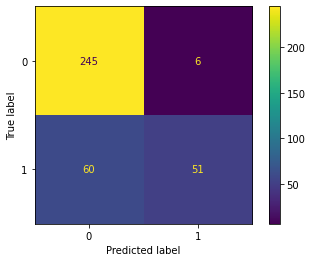

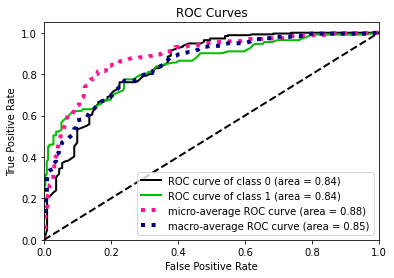


..........Tweets of anticipation Emotion..........
Random Forest Test Accuracy: 0.712707182320442
Accuracy score: 0.712707182320442
F1-score: 0.6716553287981859
Precision-score: 0.7058193077167355
Recall-score: 0.6668275418275418
ROC-AUC-score: 0.7217824967824967
[[193  29]
 [ 75  65]]


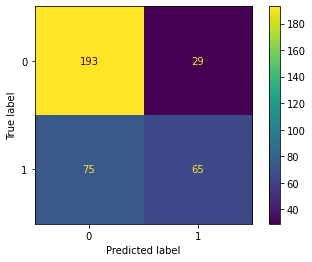

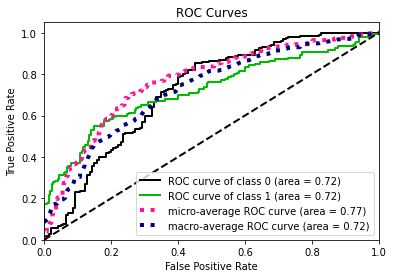


..........Tweets of disgust Emotion..........
Random Forest Test Accuracy: 0.8812154696132597
Accuracy score: 0.8812154696132597
F1-score: 0.7134125011506951
Precision-score: 0.8621364985163205
Recall-score: 0.6683774834437086
ROC-AUC-score: 0.8222682119205299
[[298   4]
 [ 39  21]]


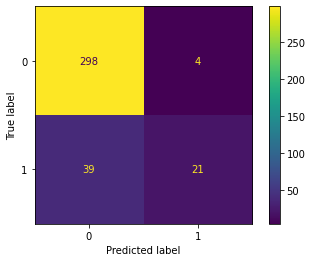

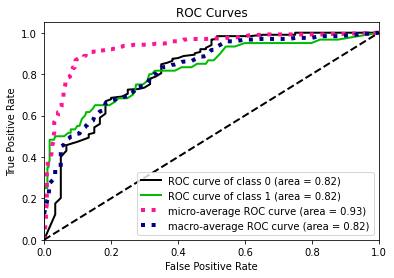


..........Tweets of fear Emotion..........
Random Forest Test Accuracy: 0.7320441988950276
Accuracy score: 0.7320441988950276
F1-score: 0.6427255985267035
Precision-score: 0.652653625253703
Recall-score: 0.6366341991341992
ROC-AUC-score: 0.6920995670995672
[[ 42  56]
 [ 41 223]]


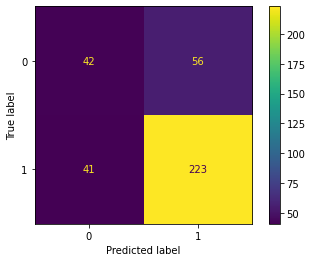

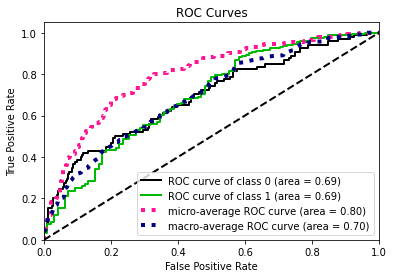


..........Tweets of joy Emotion..........
Random Forest Test Accuracy: 0.7430939226519337
Accuracy score: 0.7430939226519337
F1-score: 0.6939983093829247
Precision-score: 0.7159812638932994
Recall-score: 0.6850869136306426
ROC-AUC-score: 0.7485797870531006
[[207  32]
 [ 61  62]]


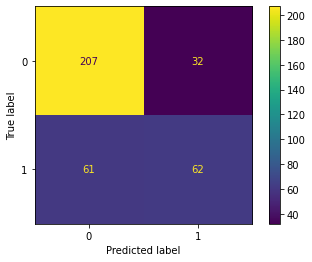

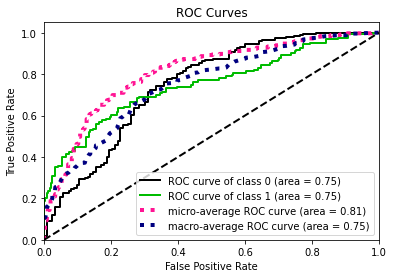


..........Tweets of sadness Emotion..........
Random Forest Test Accuracy: 0.7541436464088398
Accuracy score: 0.7541436464088398
F1-score: 0.7130438655087954
Precision-score: 0.7518551559141965
Recall-score: 0.703292746792354
ROC-AUC-score: 0.8183261324954176
[[205  23]
 [ 66  68]]


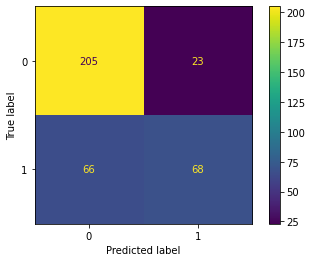

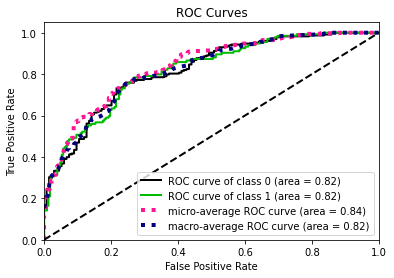


..........Tweets of surprise Emotion..........
Random Forest Test Accuracy: 0.7900552486187845
Accuracy score: 0.7900552486187845
F1-score: 0.7190359477124184
Precision-score: 0.7282650244213209
Recall-score: 0.7118864577173271
ROC-AUC-score: 0.7469544648137196
[[234  33]
 [ 43  52]]


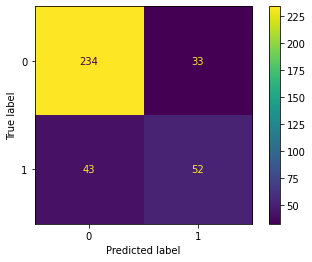

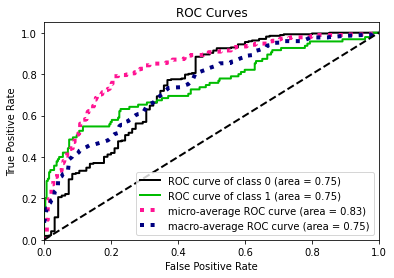


..........Tweets of trust Emotion..........
Random Forest Test Accuracy: 0.6602209944751382
Accuracy score: 0.6602209944751382
F1-score: 0.6496084989179618
Precision-score: 0.6691216034436374
Recall-score: 0.6538061595865063
ROC-AUC-score: 0.730036394776279
[[151  38]
 [ 85  88]]


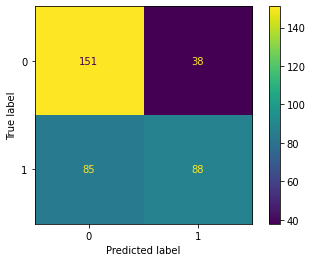

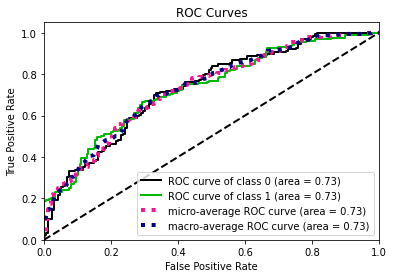

Execution time: 0:00:18.460573


In [62]:
#@title Save Best Model (Emotion - TFIDF - Unigram - RF)
emotion_pipeline_rf = Pipeline([('cv', TfidfVectorizer(ngram_range=(1,1))),
                                ('smote', SMOTE(random_state=42)),
                                ('rf_model', RandomForestClassifier(n_estimators=200))])

#List of Pipelines
pipelines = [emotion_pipeline_rf]

#Dictionary of Pipelines
pipe_dict = {0: 'Random Forest'}

class_names = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

start = datetime.now()

#Fit the Pipelines
for i, pipe in enumerate(pipelines):
  print("\n========== {} ==========".format(pipe_dict[i]))
  for emotion in class_names:
    print('\n..........Tweets of {} Emotion..........'.format(emotion))
    pipe.fit(X_emotion_train, train[emotion])

    emotion_y_predict_test = pipe.predict(X_emotion_test)
    emotion_y_predict_proba = pipe.predict_proba(X_emotion_test)
    print("{} Test Accuracy: {}".format(pipe_dict[i],pipe.score(X_emotion_test,test[emotion])))
    print('Accuracy score:',accuracy_score(test[emotion], emotion_y_predict_test))
    print('F1-score:',f1_score(test[emotion], emotion_y_predict_test, average='macro'))
    print('Precision-score:',precision_score(test[emotion], emotion_y_predict_test, average='macro'))
    print('Recall-score:',recall_score(test[emotion], emotion_y_predict_test, average='macro'))
    print('ROC-AUC-score:',roc_auc_score(test[emotion], emotion_y_predict_proba[:, 1], average='macro', multi_class='ovo'))
    print(confusion_matrix(test[emotion], emotion_y_predict_test)) 
    
    (ConfusionMatrixDisplay((metrics.confusion_matrix(test[emotion], emotion_y_predict_test)))).plot()
    skplt.metrics.plot_roc(test[emotion], emotion_y_predict_proba)
    plt.show()
    
stop = datetime.now()
execution_time = stop-start
print("Execution time:", execution_time)

model_file = open("malay_emotion_rf.pkl","wb")
joblib.dump(emotion_pipeline_rf,model_file)
model_file.close()

___